#### We noticed that the feature distributions for collections openml-train, poverty and college are quite different, but they do share similar shapes and patterns. As a consequence, we decided to normalize these features (using  all candidates for each query as a pool) and see if the results we get improve. 

#### We use mean absolute deviation to perform the normalization.

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report

FEATURES = ['query_num_of_columns', 'query_num_of_rows', 'query_row_column_ratio', 'query_max_skewness', 
            'query_max_kurtosis', 'query_max_unique', 'candidate_num_rows', 'candidate_max_skewness', 
            'candidate_max_kurtosis', 'candidate_max_unique', 'query_target_max_pearson', 'query_target_max_spearman',
            'query_target_max_covariance', 'query_target_max_mutual_info', 'candidate_target_max_pearson', 
            'candidate_target_max_spearman', 'candidate_target_max_covariance', 'candidate_target_max_mutual_info', 
            'containment_fraction']

In [38]:
def normalize_features(dataset):
    queries = set(dataset['query'])
    subtables = []
    for query in queries:
        subtable = dataset.loc[dataset['query'] == query]
        for feature in FEATURES:
          mad = subtable[feature].mad()
          if mad == 0.0:
            subtable[feature] = [0.0 for i in subtable[feature]]
          else:
            median = subtable[feature].median()  
            subtable[feature] = (subtable[feature] - median)/mad
        subtables.append(subtable)  
    return pd.concat(subtables)
       

#### Running method normalize_features in this notebook was taking too long, so I ran it for openml_train, college, poverty, and taxi and saved the results in different files. NOTE THAT OPENML_TRAIN, IN THE CONTEXT OF THIS NOTEBOOK, HAS SEVERAL CANDIDATES FOR EACH QUERY.

In [42]:
openml_train = pd.read_csv('openml_training_many_candidates_normalized_with_mad.csv')
openml_train['class'] = ['gain' if row['gain_in_r2_score'] > 0 else 'loss' for index, row in openml_train.iterrows()]

In [46]:
college = pd.read_csv('college-debt-records-features-single-column-w-class-normalized-with-mad.csv')
college['class'] = ['gain' if row['gain_in_r2_score'] > 0 else 'loss' for index, row in college.iterrows()]

poverty = pd.read_csv('poverty-estimation-results-features-and-targets-training-normalized-with-mad.csv')
poverty['class'] = ['gain' if row['gain_in_r2_score'] > 0 else 'loss' for index, row in poverty.iterrows()]

taxi = pd.read_csv('taxi-vehicle-collision-records-features-single-column-w-class-normalized-with-mad.csv')
taxi['class'] = ['gain' if row['gain_in_r2_score'] > 0 else 'loss' for index, row in taxi.iterrows()]

#### As a comparison, I'll load the original versions of these datasets, too.

In [44]:
openml_train_original = pd.read_csv('training-simplified-data-generation-many-candidates-per-query_with_median_and_mean_based_classes.csv')
openml_train_original['class'] = ['gain' if row['gain_in_r2_score'] > 0 else 'loss' for index, row in openml_train_original.iterrows()]

In [47]:
college_original = pd.read_csv('college-debt-records-features-single-column-w-class')
college_original['class'] = ['gain' if row['gain_in_r2_score'] > 0 else 'loss' for index, row in college_original.iterrows()]

poverty_original = pd.read_csv('poverty-estimation-results-features-and-targets-training.csv')
poverty_original['class'] = ['gain' if row['gain_in_r2_score'] > 0 else 'loss' for index, row in poverty_original.iterrows()]

taxi_original = pd.read_csv('taxi-vehicle-collision-records-features-single-column-w-class')
taxi_original['class'] = ['gain' if row['gain_in_r2_score'] > 0 else 'loss' for index, row in taxi_original.iterrows()]

#### Let's train over openml_train_original and check the results over college_original, poverty_original, and taxi_original.

In [48]:
rf_original = RandomForestClassifier(n_estimators=100, random_state=42)
rf_original.fit(openml_train_original[FEATURES], openml_train_original['class'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [49]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(openml_train[FEATURES], openml_train['class'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

#### Let's see what are the most important features for each one of these models.

In [50]:
print(sorted([(feature, value) for feature, value in zip(FEATURES, rf_original.feature_importances_)], key=lambda x: x[1], reverse=True))

[('candidate_target_max_spearman', 0.081719193951595215), ('candidate_target_max_pearson', 0.079383184608569218), ('candidate_max_skewness', 0.075566356523494277), ('candidate_target_max_covariance', 0.075311606711633269), ('candidate_max_kurtosis', 0.074685024885473295), ('candidate_target_max_mutual_info', 0.065256121600704667), ('query_row_column_ratio', 0.060700469442662837), ('query_num_of_columns', 0.06051224482349473), ('candidate_max_unique', 0.05391453165480347), ('candidate_num_rows', 0.053141387277952444), ('query_target_max_covariance', 0.042859778233359451), ('query_max_kurtosis', 0.042824178391758096), ('query_max_skewness', 0.04031720752016861), ('query_target_max_spearman', 0.037573697476277382), ('query_target_max_pearson', 0.036087532443486038), ('query_target_max_mutual_info', 0.032742978247140016), ('query_max_unique', 0.032704970424870201), ('containment_fraction', 0.032391562160371333), ('query_num_of_rows', 0.02230797362218552)]


In [51]:
print(sorted([(feature, value) for feature, value in zip(FEATURES, rf.feature_importances_)], key=lambda x: x[1], reverse=True))

[('candidate_target_max_mutual_info', 0.12336683962677851), ('candidate_target_max_spearman', 0.12166915678089232), ('candidate_target_max_pearson', 0.11891681368337148), ('candidate_max_unique', 0.11532918595255515), ('candidate_target_max_covariance', 0.11448075123812922), ('candidate_max_skewness', 0.11152233421013592), ('candidate_num_rows', 0.10982365922884804), ('candidate_max_kurtosis', 0.10927491591053676), ('containment_fraction', 0.075616343368752434), ('query_num_of_columns', 0.0), ('query_num_of_rows', 0.0), ('query_row_column_ratio', 0.0), ('query_max_skewness', 0.0), ('query_max_kurtosis', 0.0), ('query_max_unique', 0.0), ('query_target_max_pearson', 0.0), ('query_target_max_spearman', 0.0), ('query_target_max_covariance', 0.0), ('query_target_max_mutual_info', 0.0)]


#### Note that the normalized model does not really make use of query features. Technically, this is something we might consider addressing, but maybe differently. How about "how large is the query dataset wrt the candidate" instead of just number of rows?

#### Now let's see the quality of the predictions.

In [52]:
college_original_preds = rf_original.predict(college_original[FEATURES])
print(classification_report(college_original['class'], college_original_preds))

              precision    recall  f1-score   support

        gain       0.12      0.67      0.21       130
        loss       0.89      0.37      0.52       973

   micro avg       0.40      0.40      0.40      1103
   macro avg       0.51      0.52      0.37      1103
weighted avg       0.80      0.40      0.49      1103



In [53]:
poverty_original_preds = rf_original.predict(poverty_original[FEATURES])
print(classification_report(poverty_original['class'], poverty_original_preds))

              precision    recall  f1-score   support

        gain       0.01      0.02      0.02     11526
        loss       0.90      0.83      0.87    119402

   micro avg       0.76      0.76      0.76    130928
   macro avg       0.46      0.43      0.44    130928
weighted avg       0.82      0.76      0.79    130928



In [54]:
taxi_original_preds = rf_original.predict(taxi_original[FEATURES])
print(classification_report(taxi_original['class'], taxi_original_preds))

              precision    recall  f1-score   support

        gain       1.00      0.55      0.71       447
        loss       0.00      0.00      0.00         0

   micro avg       0.55      0.55      0.55       447
   macro avg       0.50      0.28      0.36       447
weighted avg       1.00      0.55      0.71       447



/Users/alibezz/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### The original results show that the original model does not really generalize for the case studies. Previously, we found out that this has a lot to do with features "in different scales", so let's see if the normalized model, without the query features, works.  

In [55]:
college_preds = rf.predict(college[FEATURES])
print(classification_report(college['class'], college_preds))

              precision    recall  f1-score   support

        gain       0.10      0.50      0.17       130
        loss       0.86      0.41      0.56       973

   micro avg       0.42      0.42      0.42      1103
   macro avg       0.48      0.46      0.36      1103
weighted avg       0.77      0.42      0.51      1103



In [56]:
poverty_preds = rf.predict(poverty[FEATURES])
print(classification_report(poverty['class'], poverty_preds))

              precision    recall  f1-score   support

        gain       0.10      0.44      0.17     11526
        loss       0.92      0.62      0.74    119402

   micro avg       0.61      0.61      0.61    130928
   macro avg       0.51      0.53      0.45    130928
weighted avg       0.85      0.61      0.69    130928



In [57]:
taxi_preds = rf.predict(taxi[FEATURES])
print(classification_report(taxi['class'], taxi_preds))

              precision    recall  f1-score   support

        gain       1.00      0.59      0.74       447
        loss       0.00      0.00      0.00         0

   micro avg       0.59      0.59      0.59       447
   macro avg       0.50      0.30      0.37       447
weighted avg       1.00      0.59      0.74       447



#### It seems like results got a bit better (with the exception of college), but are still far from ideal. Let's again see how the features are separated for these normalized datasets...

In [60]:
import matplotlib.pyplot as plt
OUTLIER_THRESHOLD_MAD = 3
def remove_outliers_based_on_mad(feature):
  mad = feature.mad() #median_absolute_deviation(feature)
  median = np.median(feature)
  return [i for i in feature if np.fabs((i - median)/mad) < OUTLIER_THRESHOLD_MAD]


def plot_two_kinds_of_histograms(data1, label1, data2, label2):
  """ This function plots histograms for features and targets, just like                                                                                                          
  function 'plot_features_and_target_histograms' for two different data (data1 and data2)                                                                                         
  """
  for feature_name in FEATURES:                                                                                                                        
    tmp1 = remove_outliers_based_on_mad(data1[feature_name])                                                                                                 
    tmp2 = remove_outliers_based_on_mad(data2[feature_name])                                                                                                 
    plt.hist(tmp1, bins=50, alpha=0.7, label=label1, color='blue')
    plt.hist(tmp2, bins=50, alpha=0.7, label=label2, color='red')
    plt.xlabel('Value Ranges')
    plt.ylabel('Percentages')
    plt.title(feature_name)                                                                                                         
    plt.legend()
    plt.show() 
    #plt.close()

/Users/alibezz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars


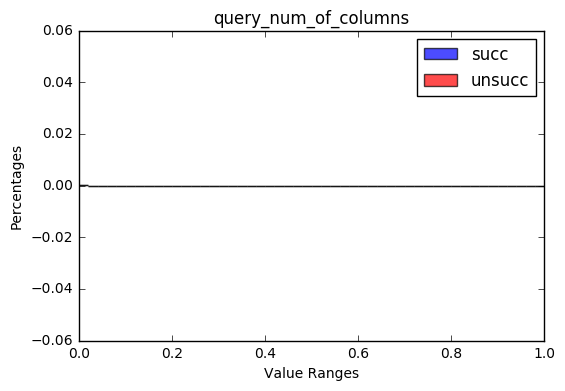

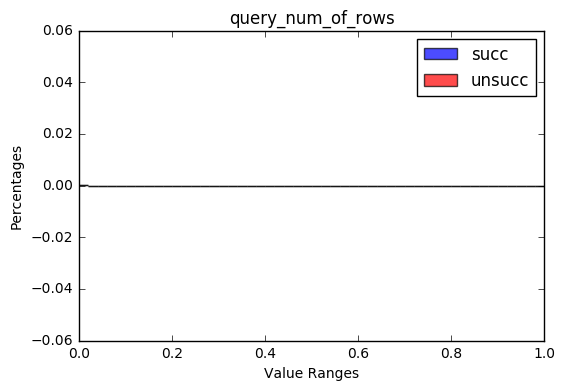

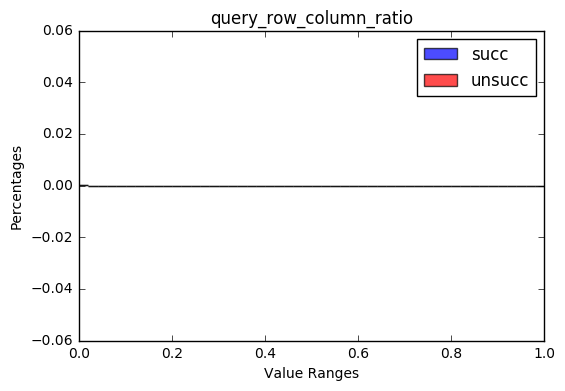

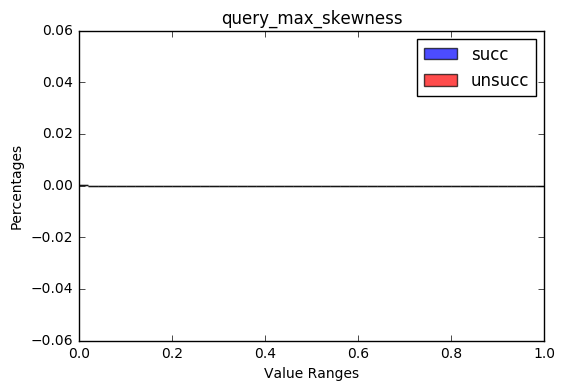

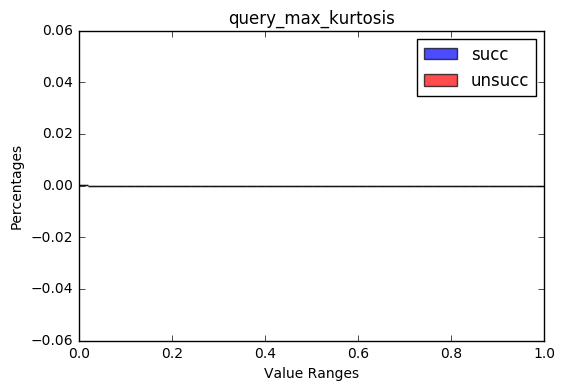

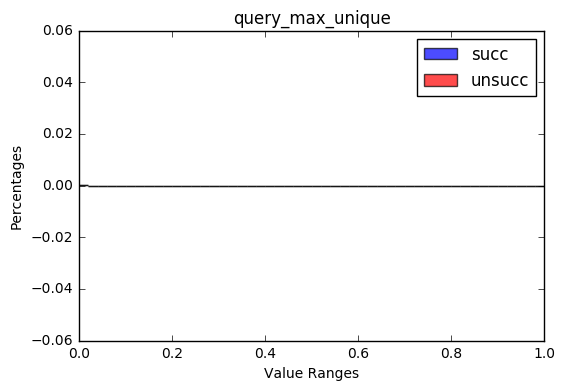

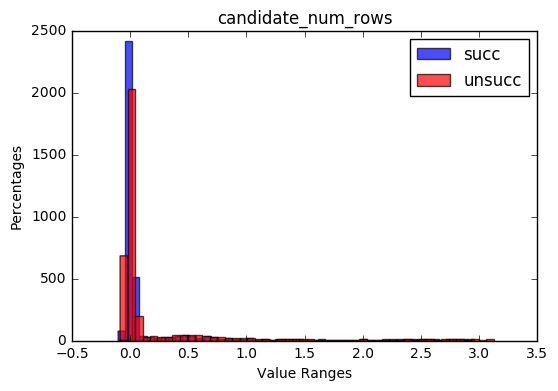

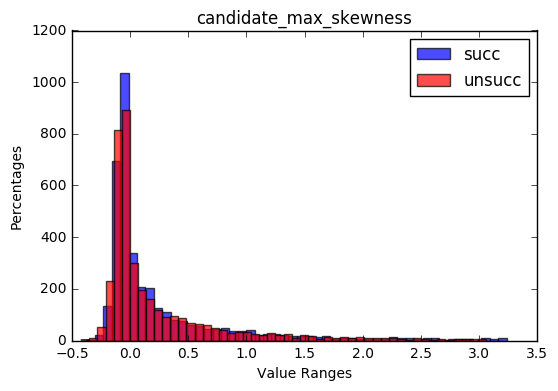

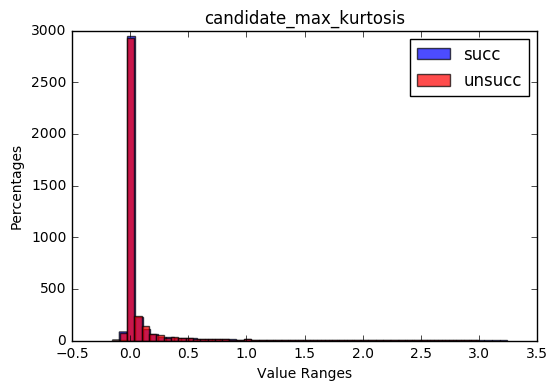

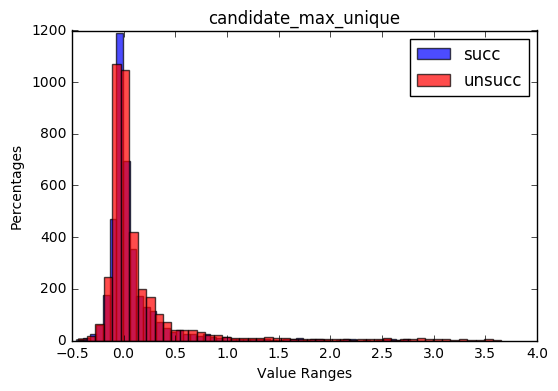

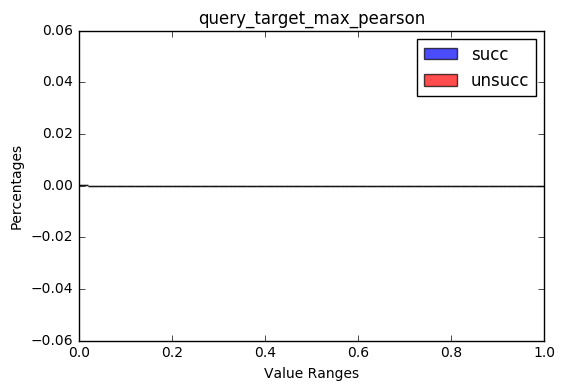

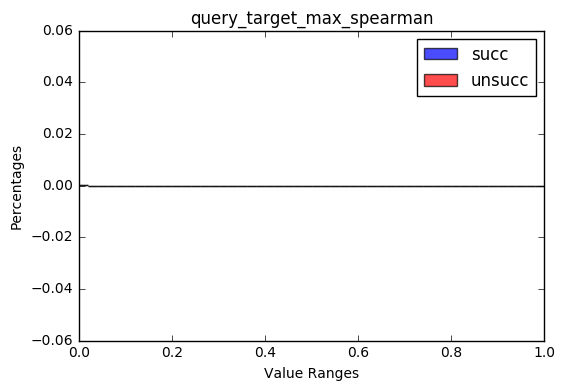

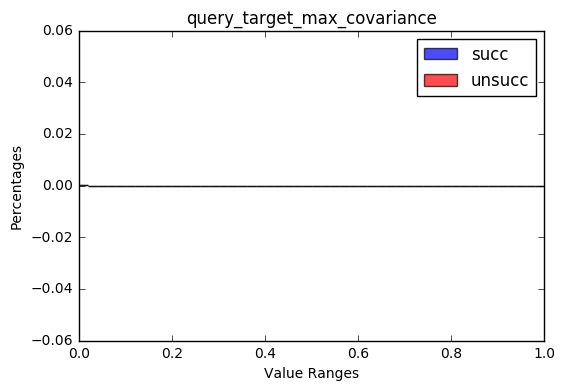

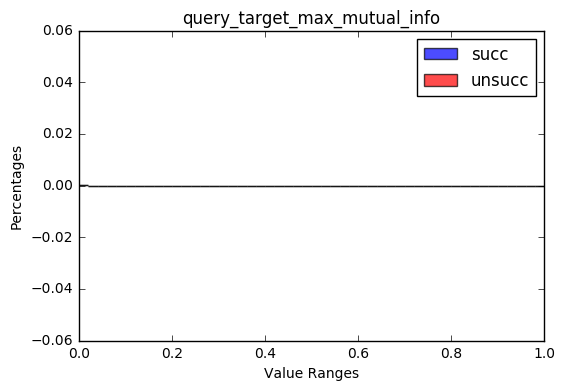

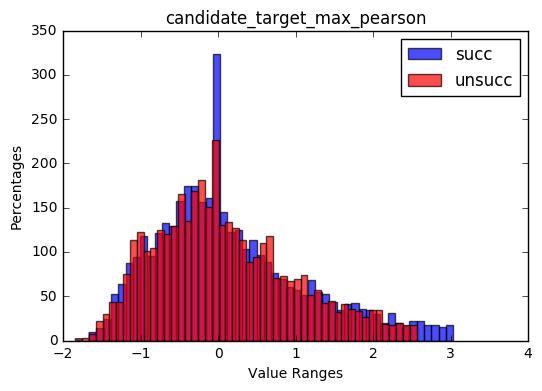

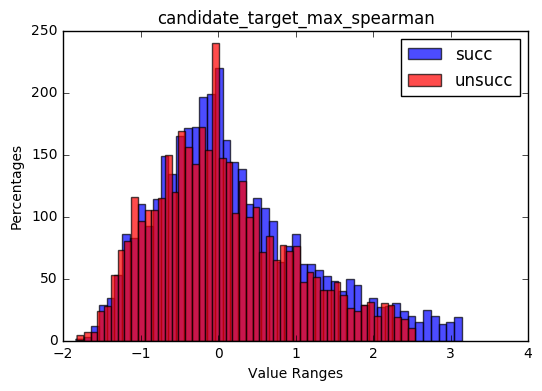

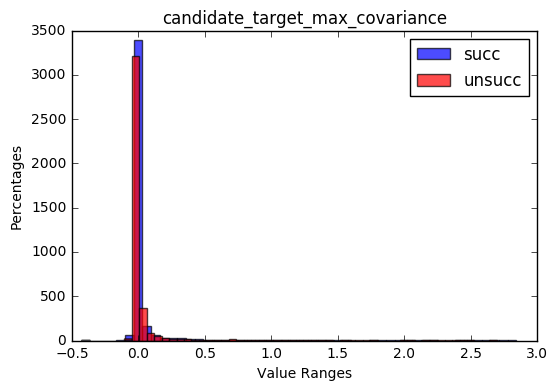

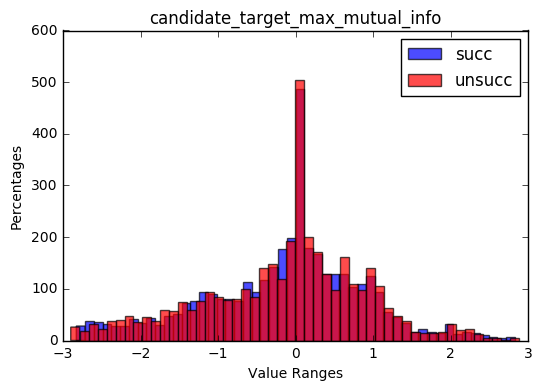

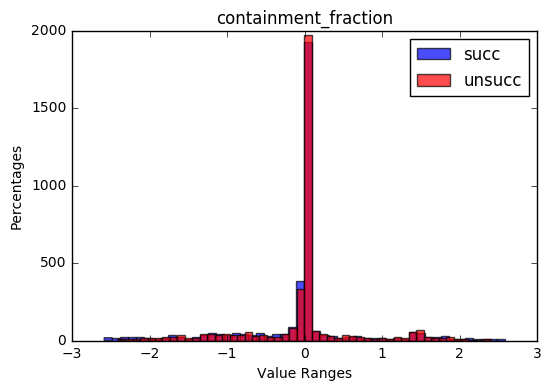

In [61]:
succ = openml_train.loc[openml_train['class'] == 'gain'].sample(n=4000)
unsucc = openml_train.loc[openml_train['class'] == 'loss'].sample(n=4000)
plot_two_kinds_of_histograms(succ, 'succ', unsucc, 'unsucc')

#### Whoah, very little separability! Let's see how openml_train_original looks like.

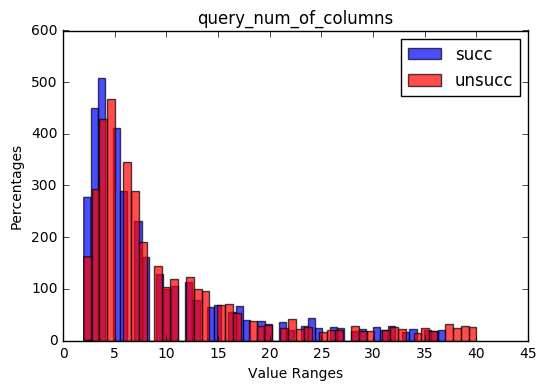

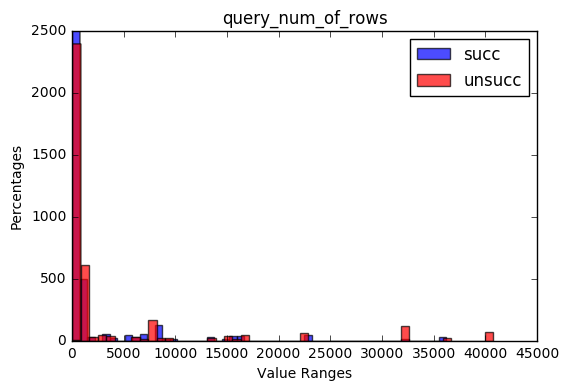

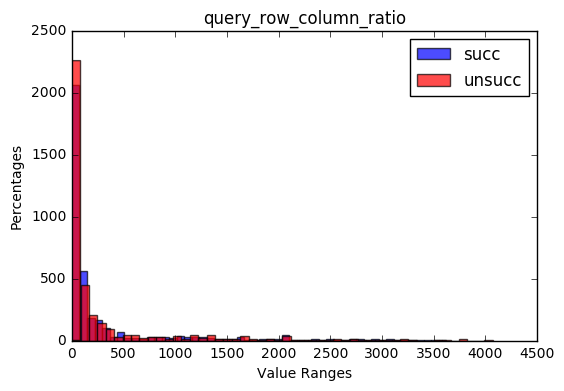

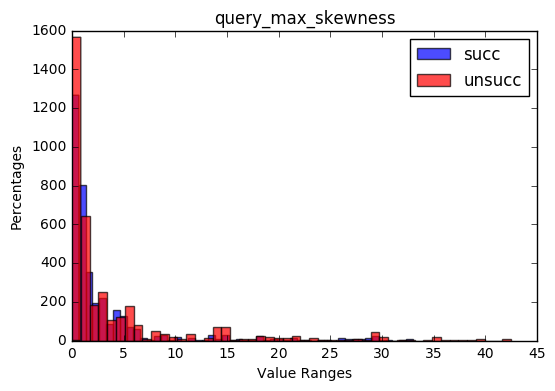

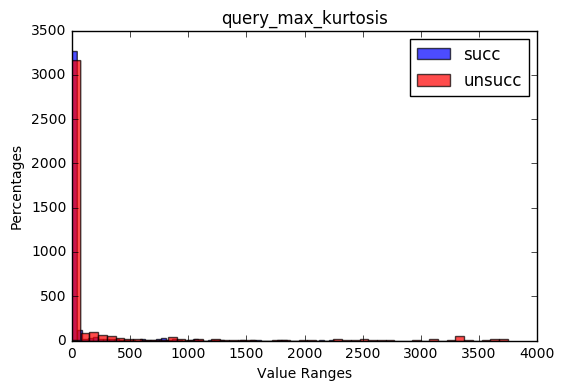

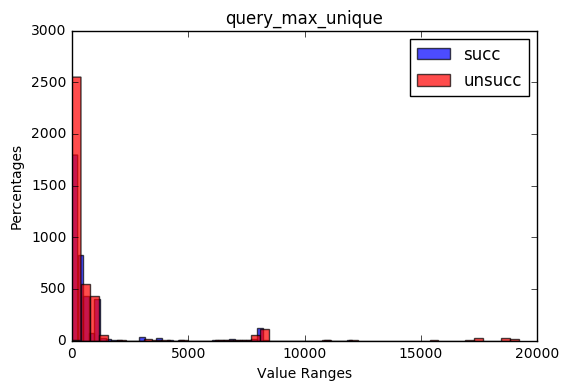

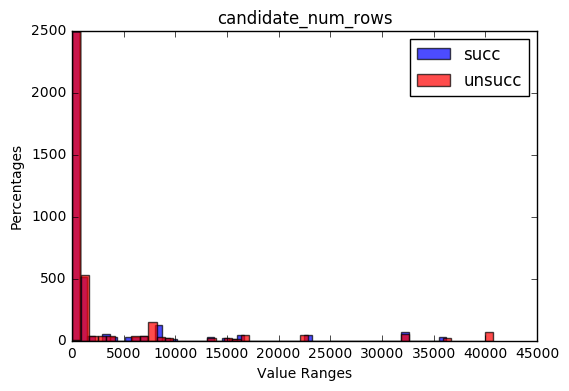

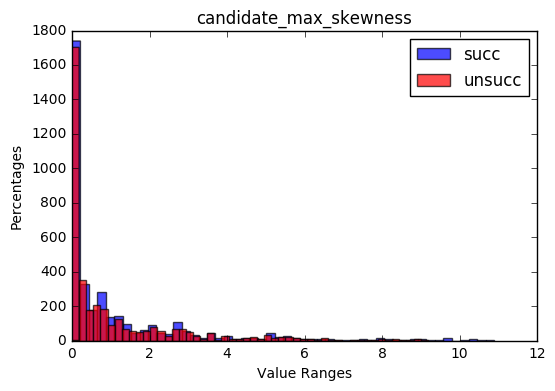

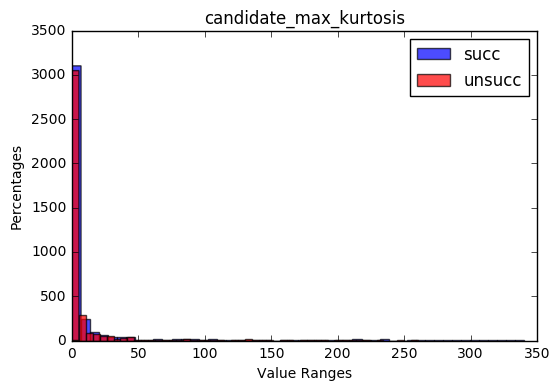

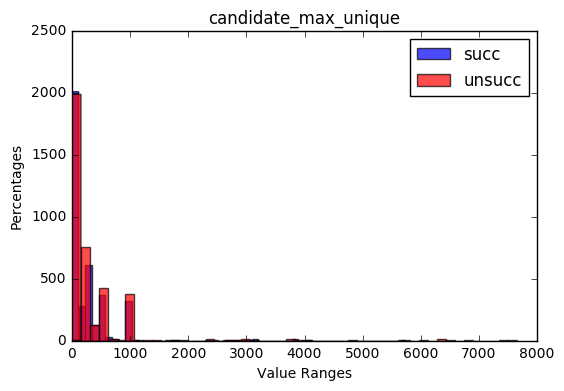

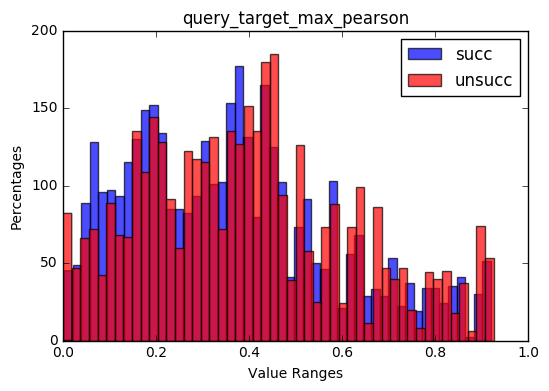

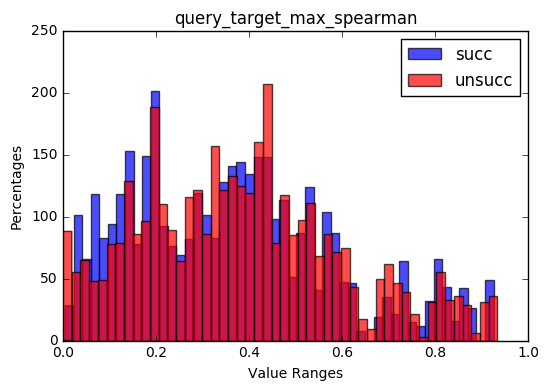

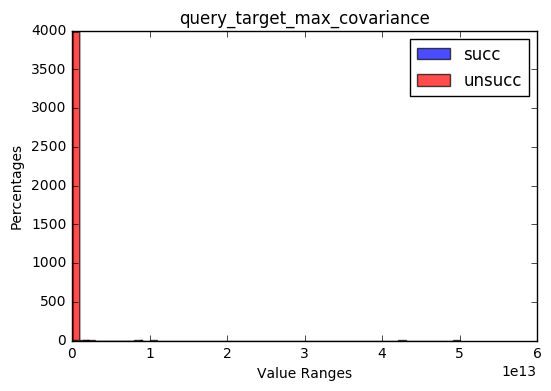

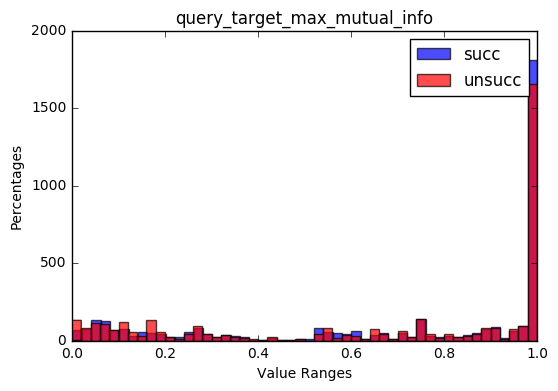

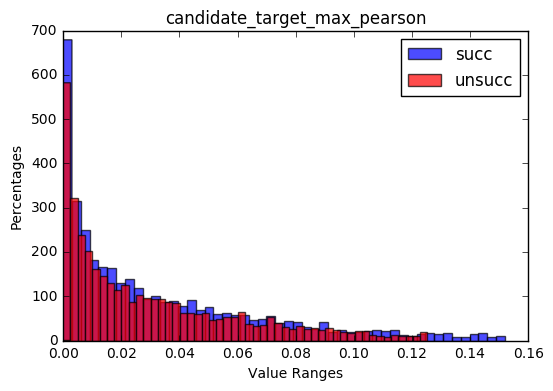

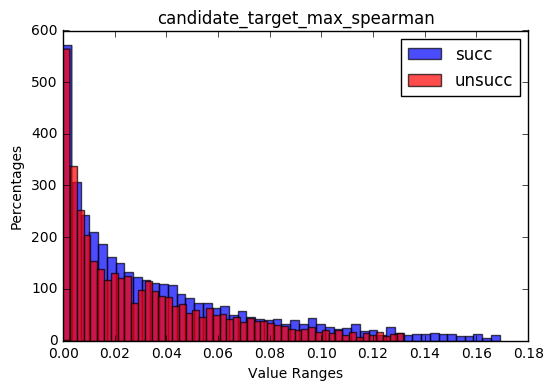

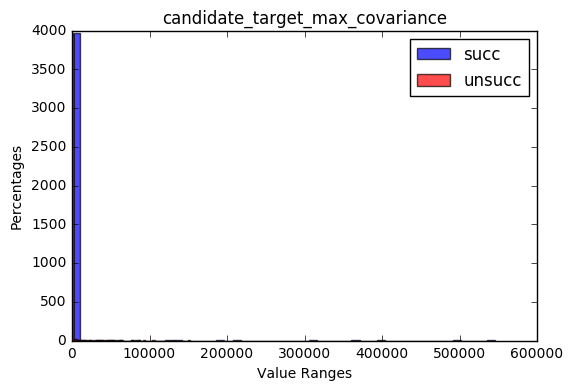

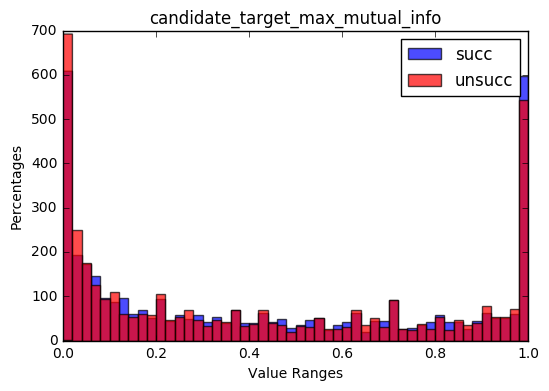

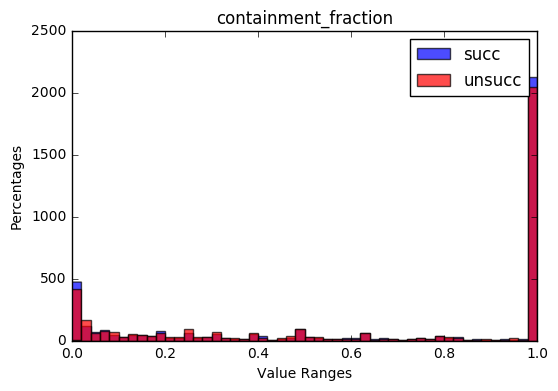

In [62]:
succ = openml_train_original.loc[openml_train_original['class'] == 'gain'].sample(n=4000)
unsucc = openml_train_original.loc[openml_train_original['class'] == 'loss'].sample(n=4000)
plot_two_kinds_of_histograms(succ, 'succ', unsucc, 'unsucc')

#### The original version of openml_train is not that great either. Let's check the normalized and original versions of college.

/Users/alibezz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars


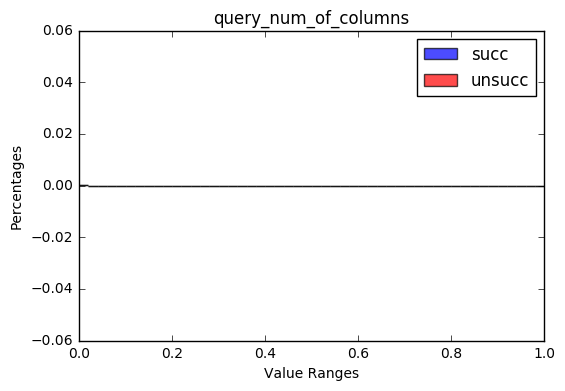

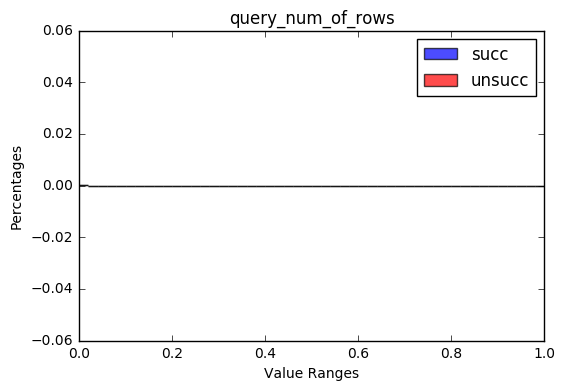

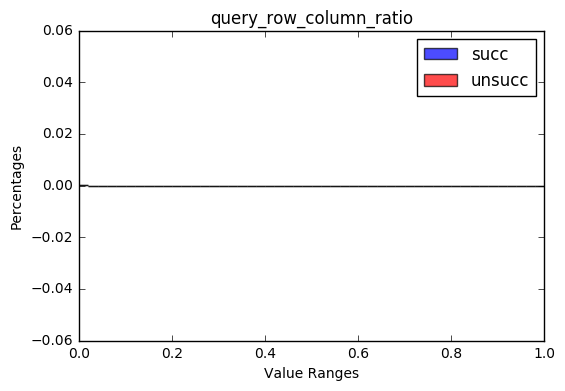

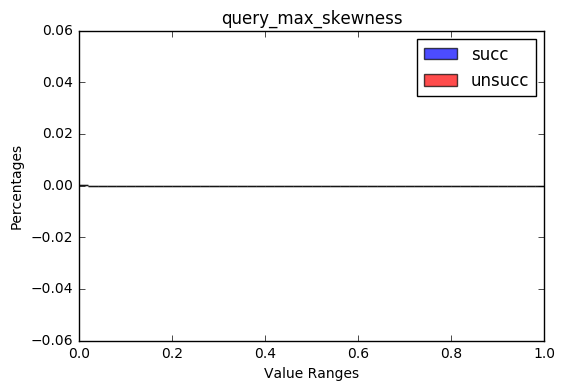

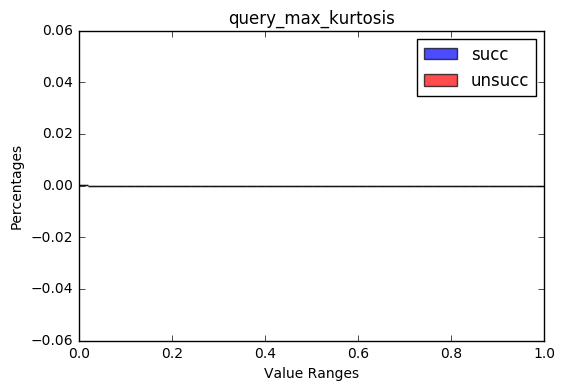

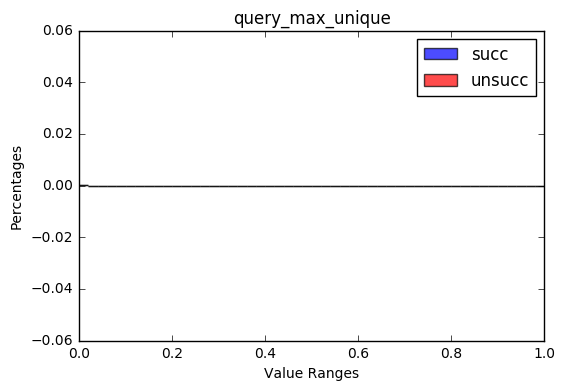

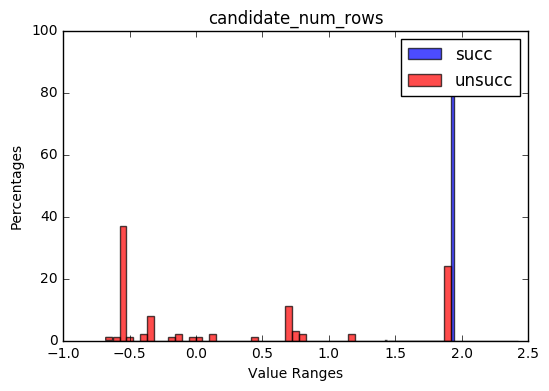

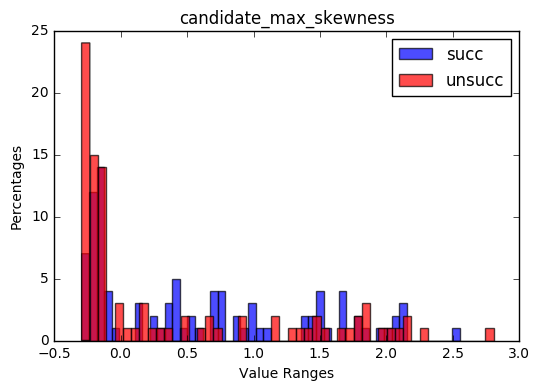

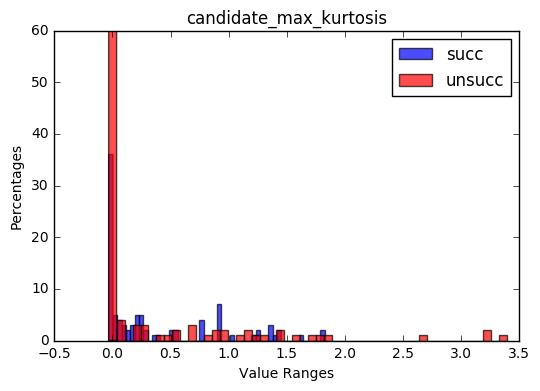

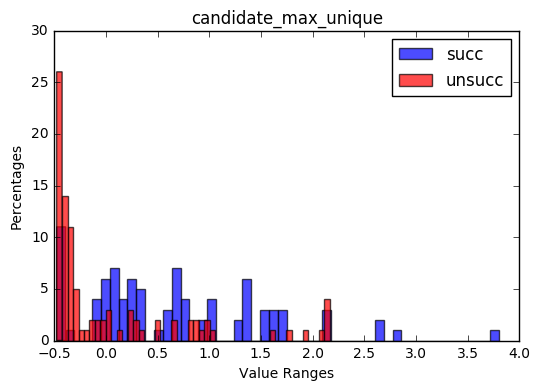

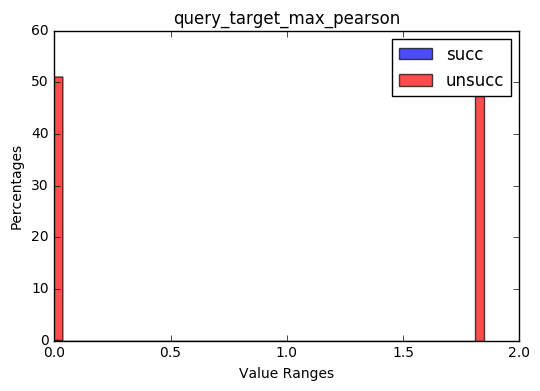

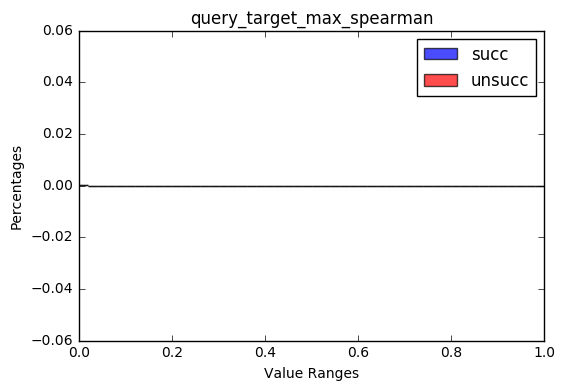

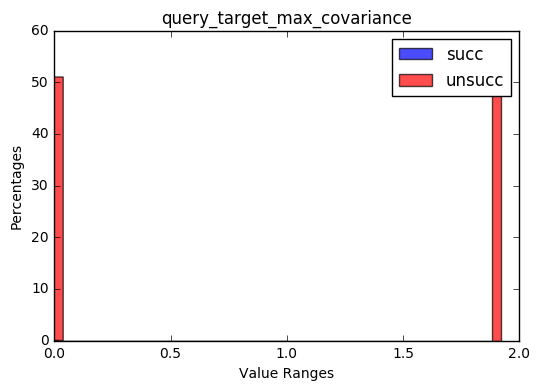

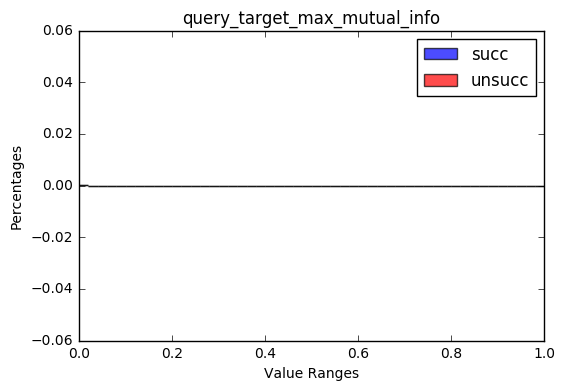

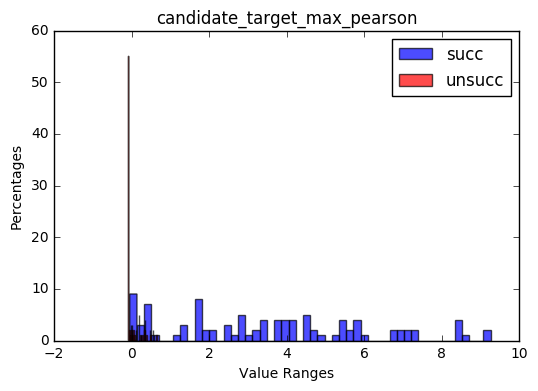

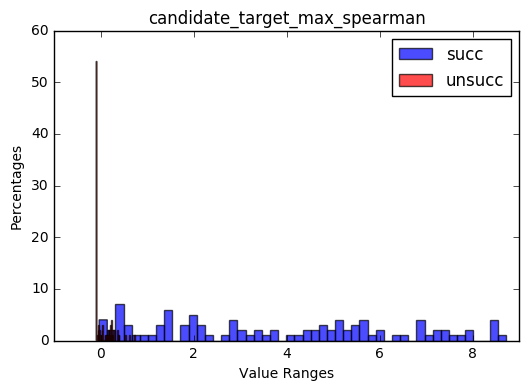

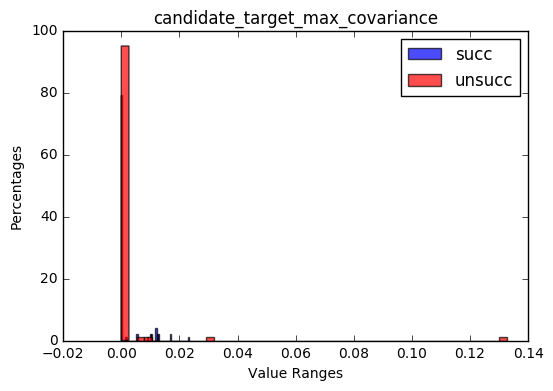

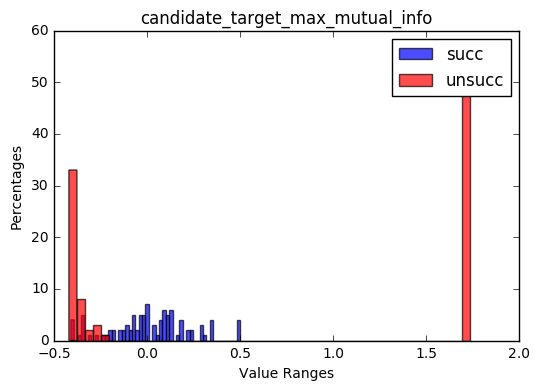

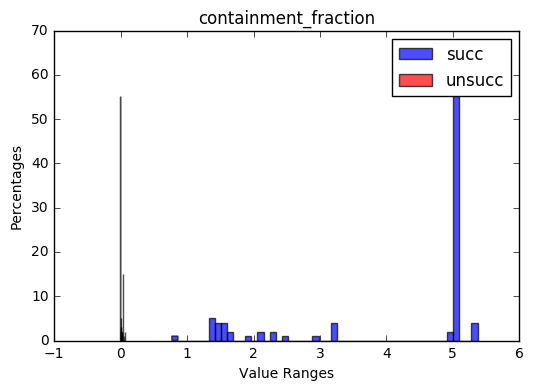

In [64]:
succ = college.loc[college['class'] == 'gain'].sample(n=100)
unsucc = college.loc[college['class'] == 'loss'].sample(n=100)
plot_two_kinds_of_histograms(succ, 'succ', unsucc, 'unsucc')

/Users/alibezz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars


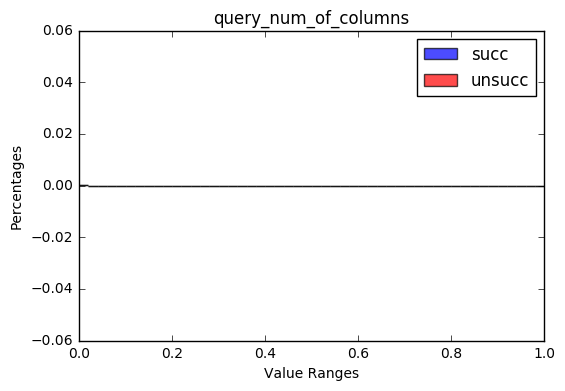

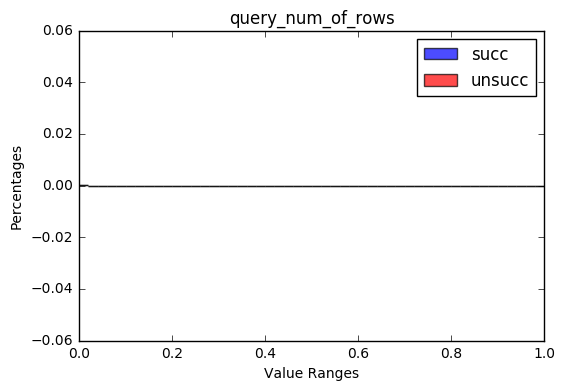

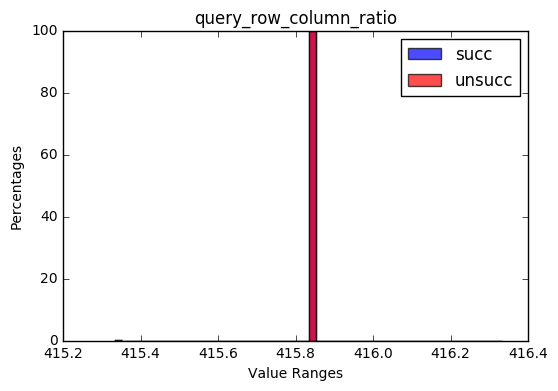

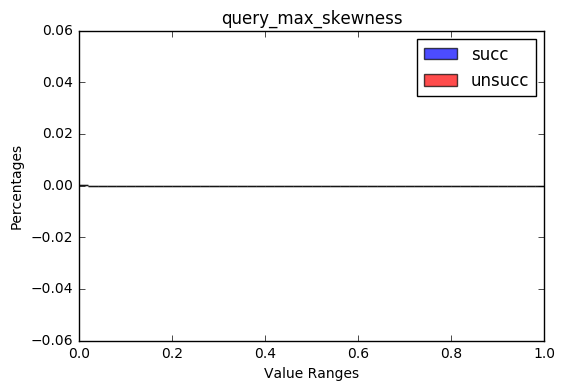

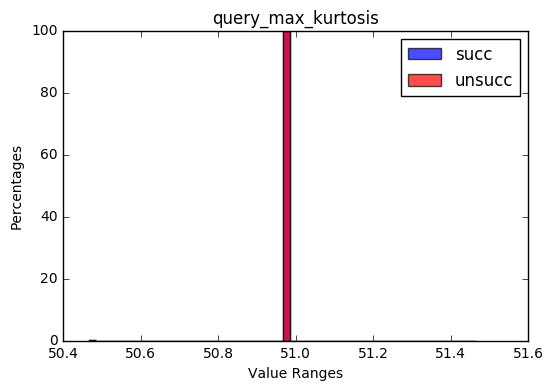

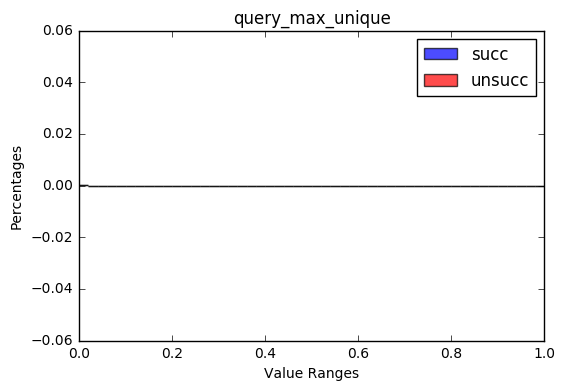

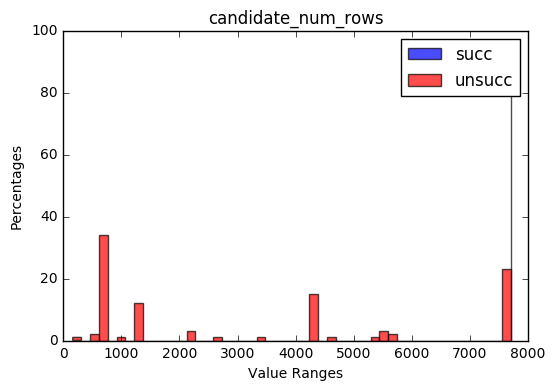

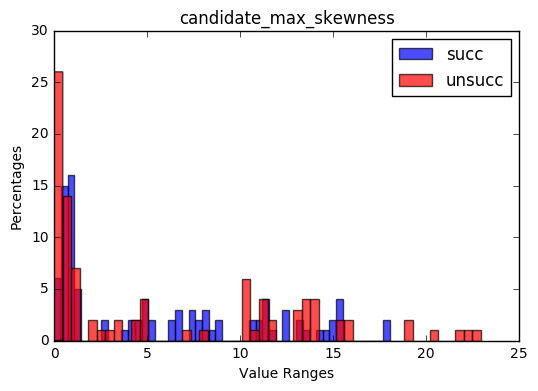

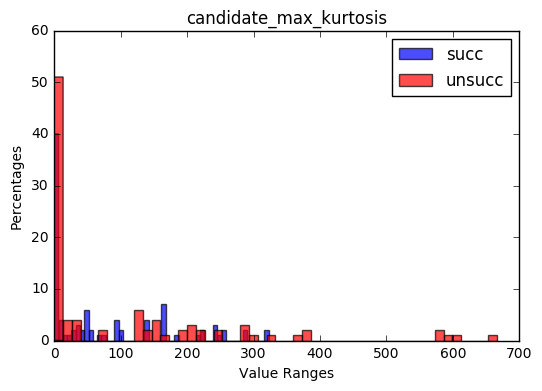

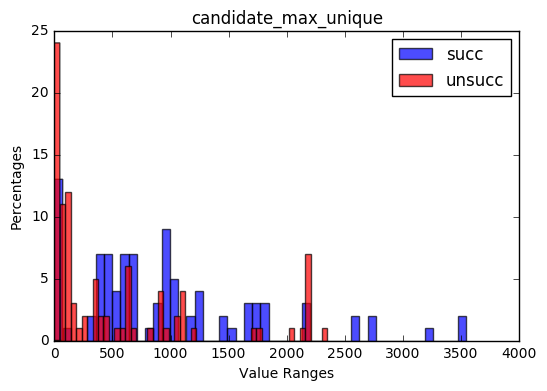

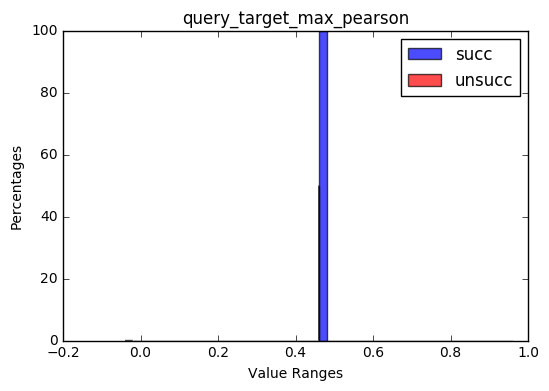

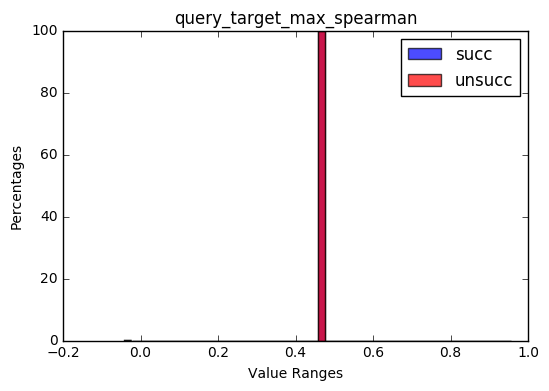

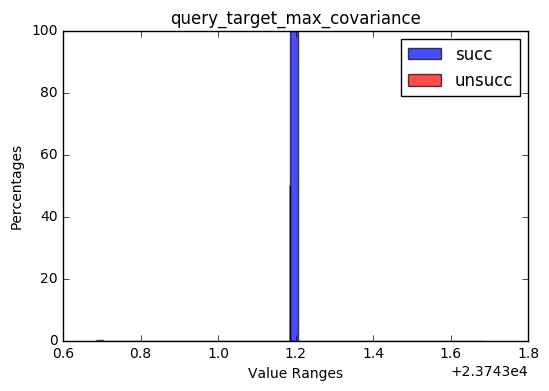

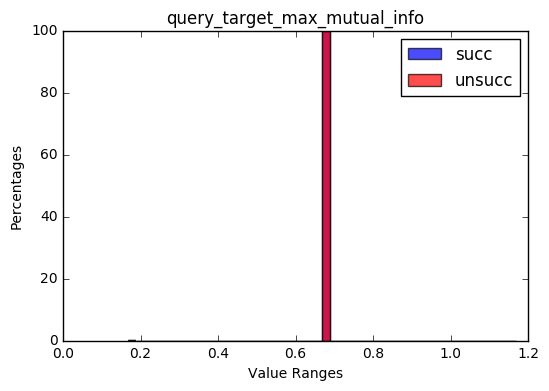

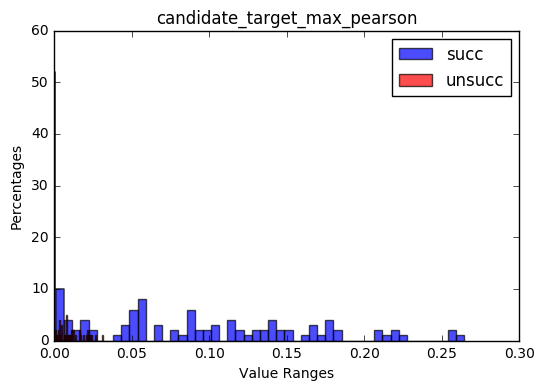

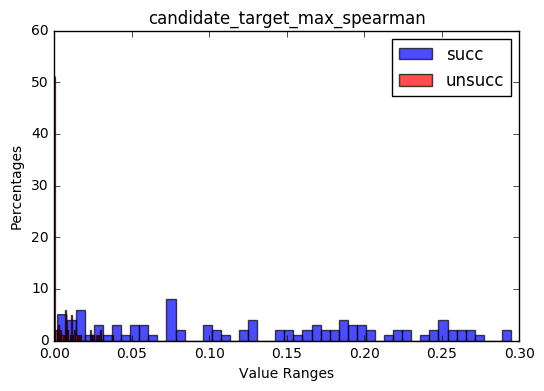

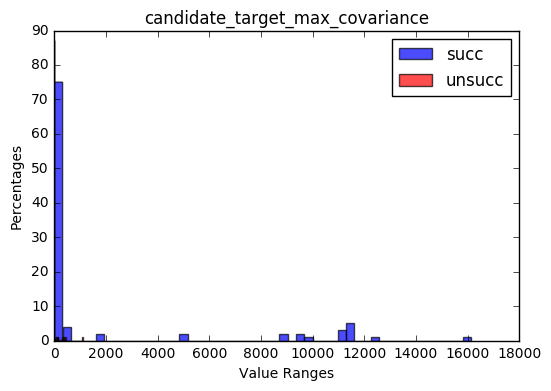

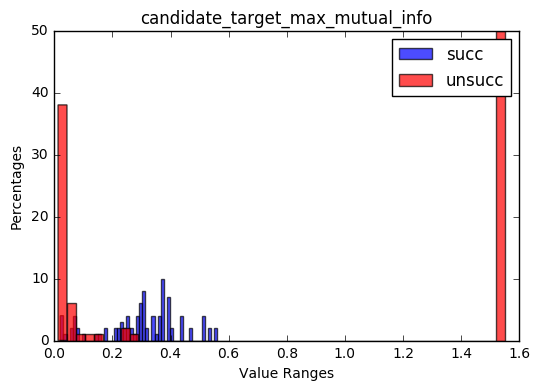

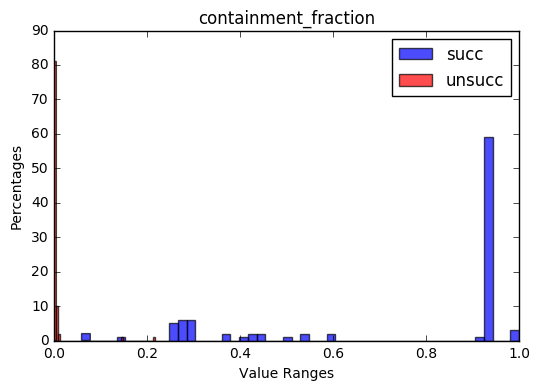

In [65]:
succ = college_original.loc[college_original['class'] == 'gain'].sample(n=100)
unsucc = college_original.loc[college_original['class'] == 'loss'].sample(n=100)
plot_two_kinds_of_histograms(succ, 'succ', unsucc, 'unsucc')

#### The shapes are mostly fairly similar... Let's check for poverty and taxi.

/Users/alibezz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars


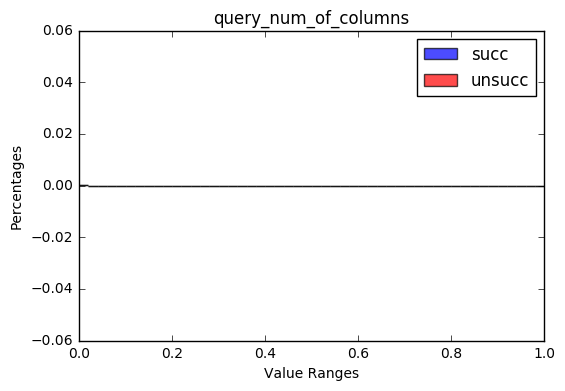

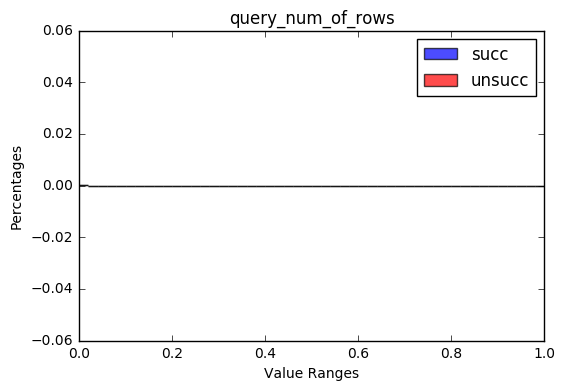

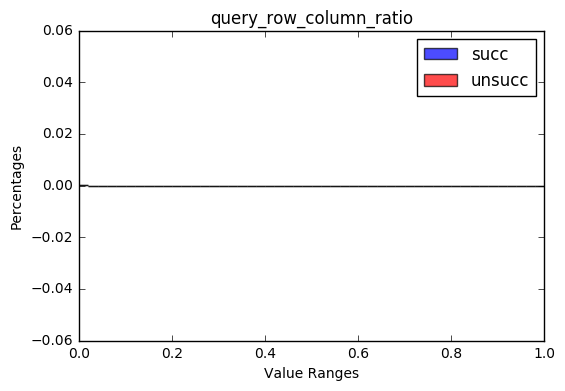

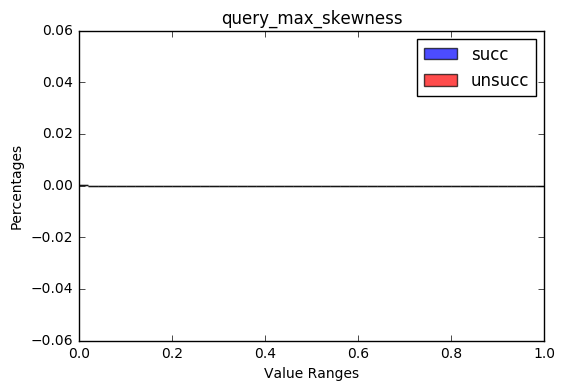

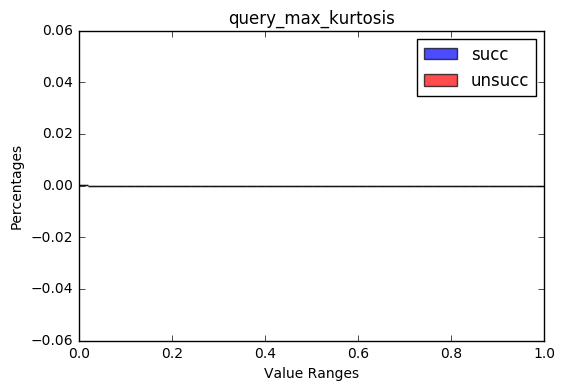

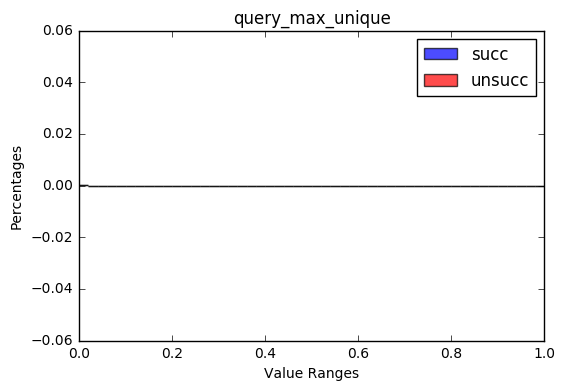

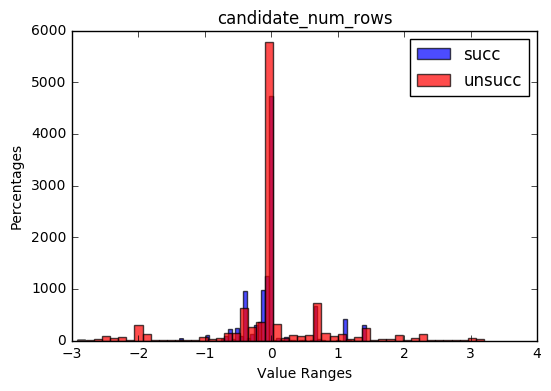

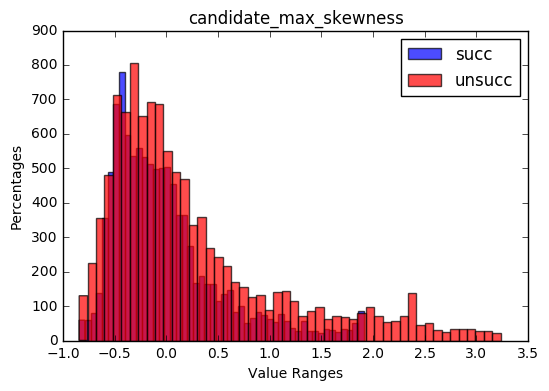

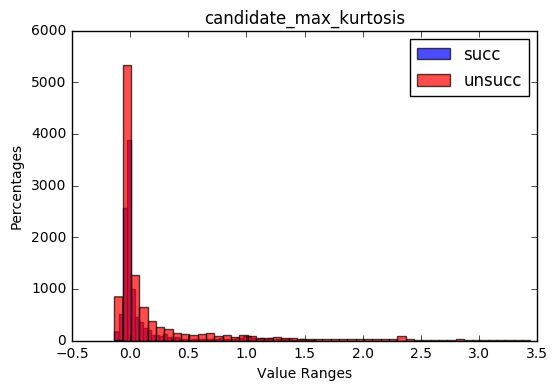

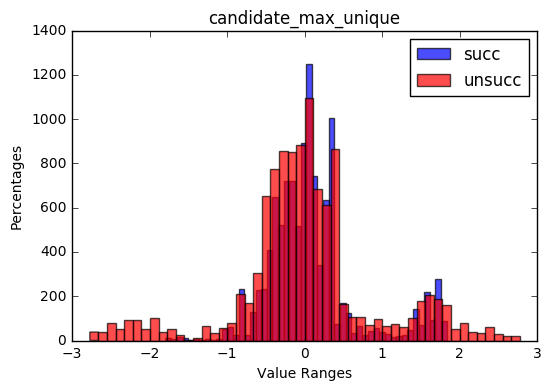

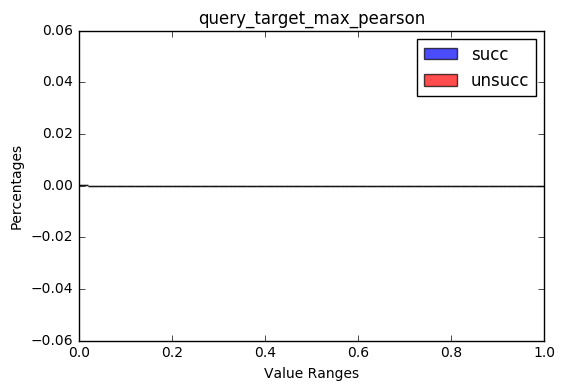

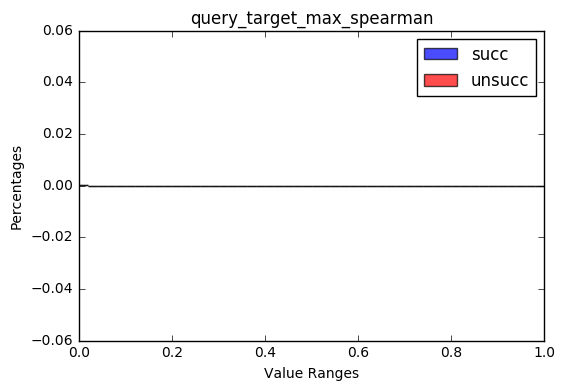

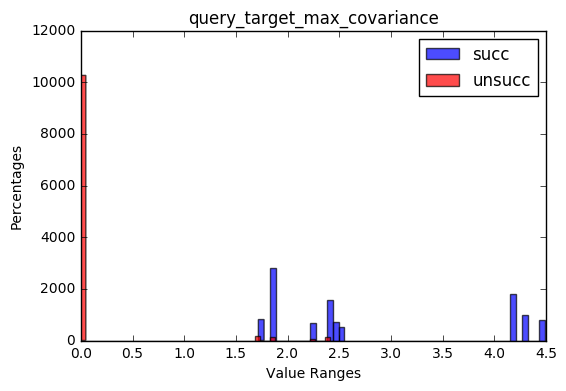

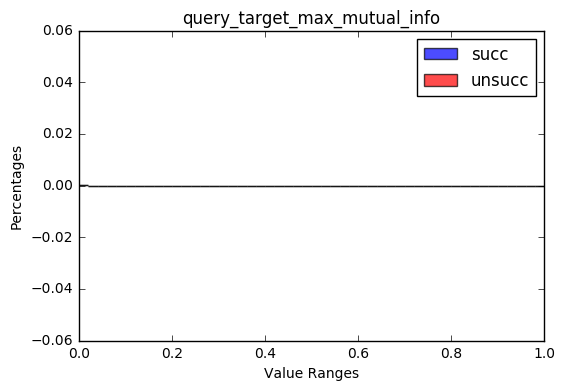

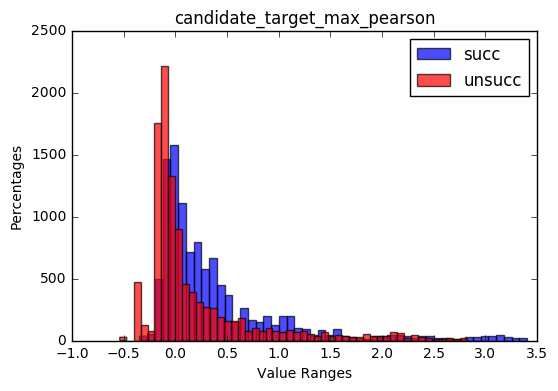

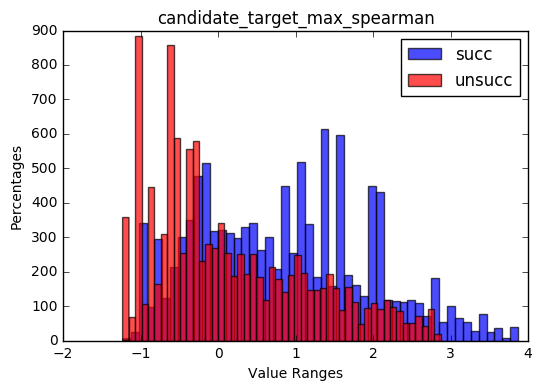

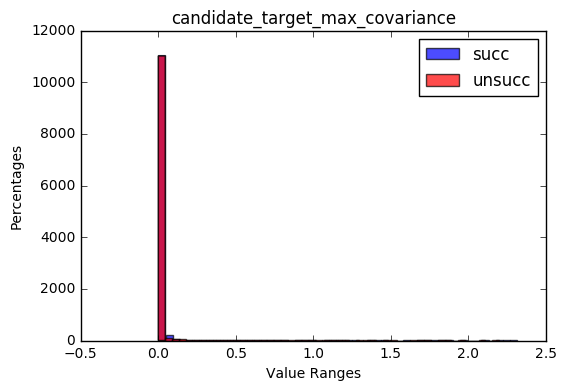

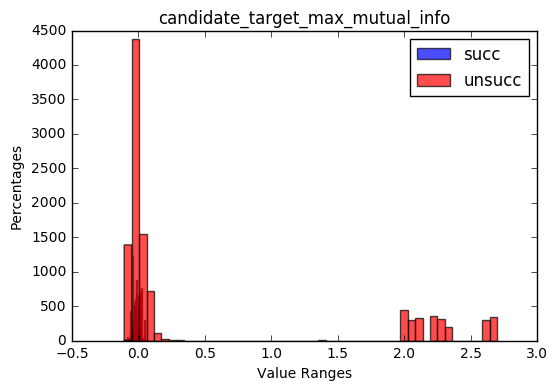

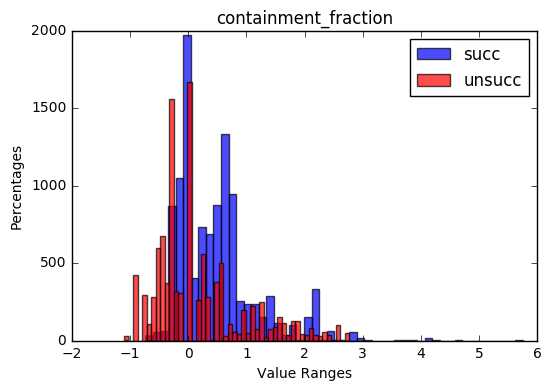

In [68]:
succ = poverty.loc[poverty['class'] == 'gain'].sample(n=11500)
unsucc = poverty.loc[poverty['class'] == 'loss'].sample(n=11500)
plot_two_kinds_of_histograms(succ, 'succ', unsucc, 'unsucc')

/Users/alibezz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars


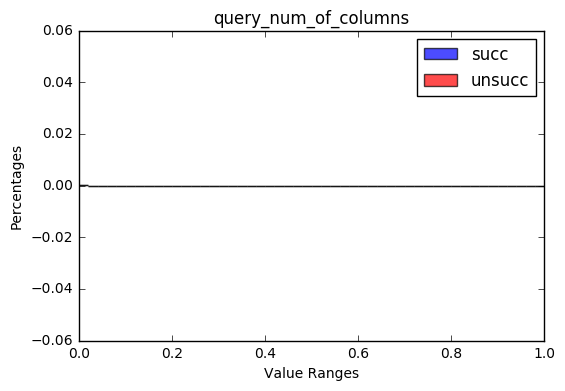

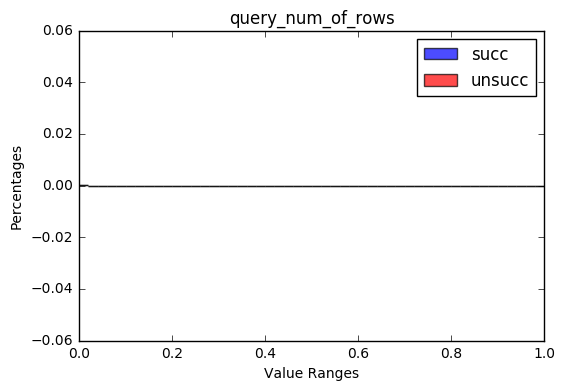

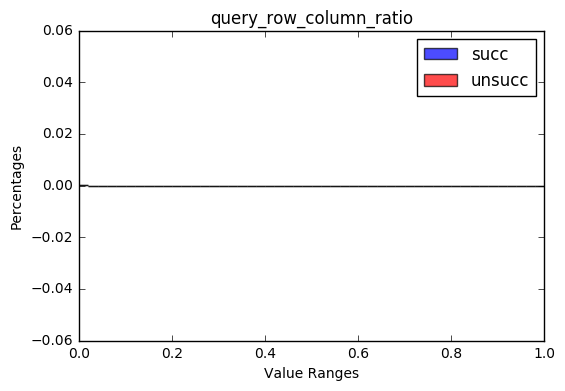

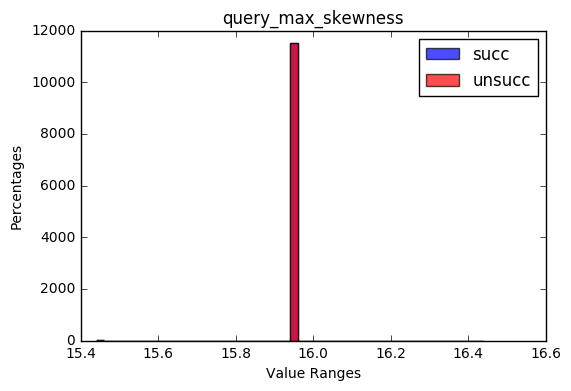

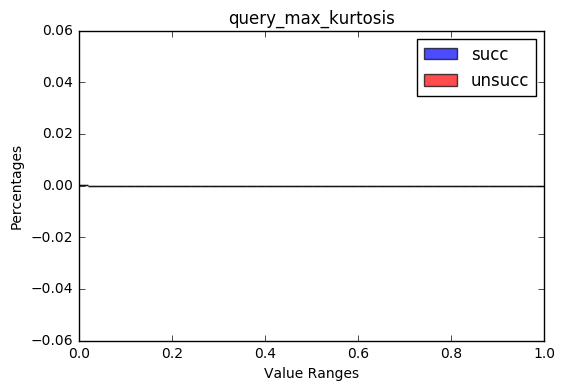

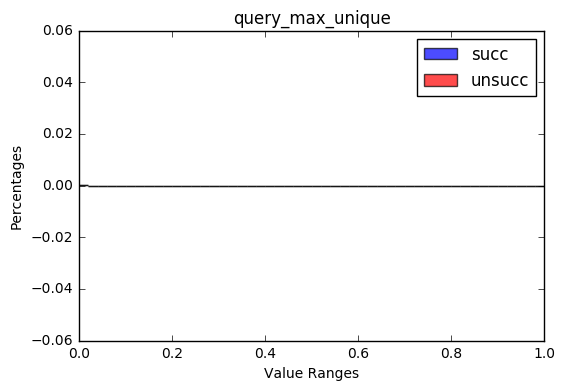

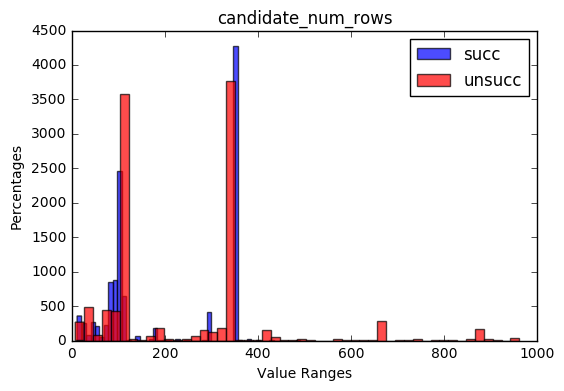

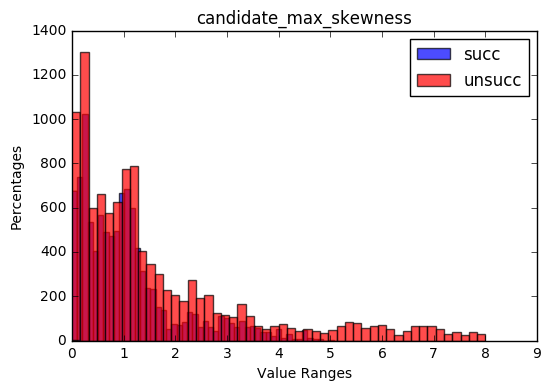

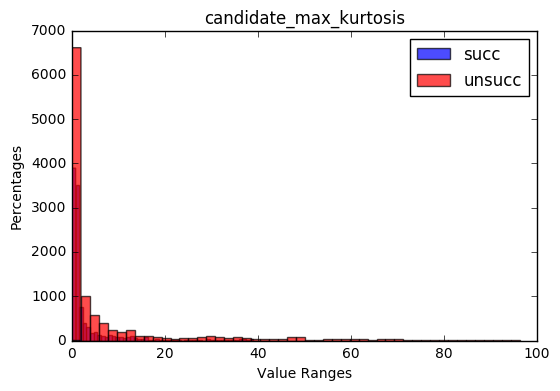

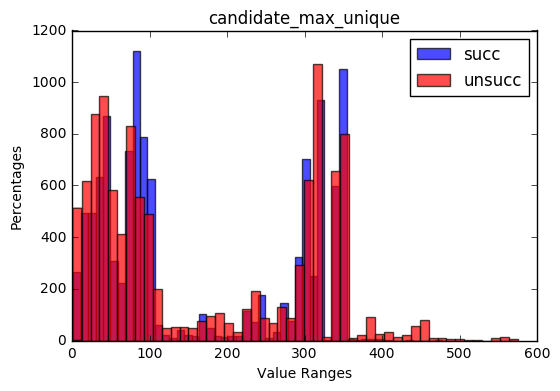

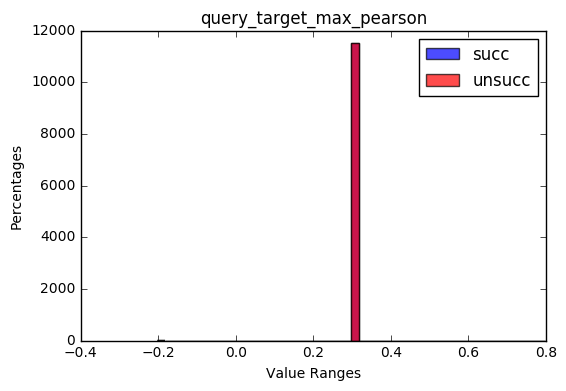

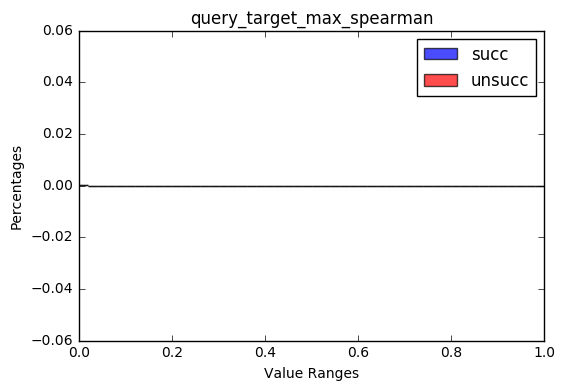

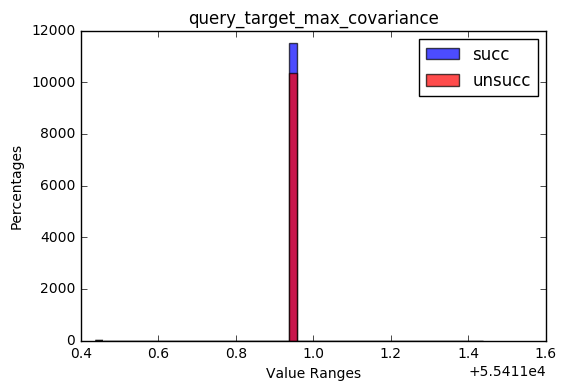

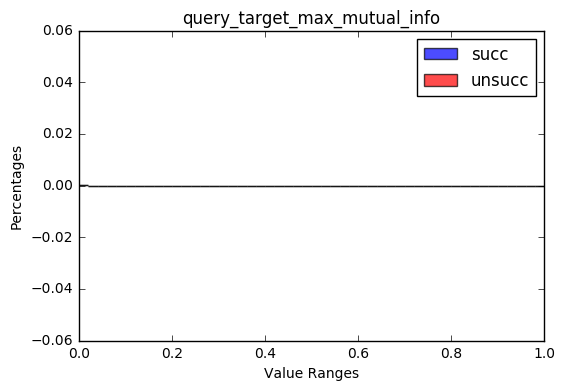

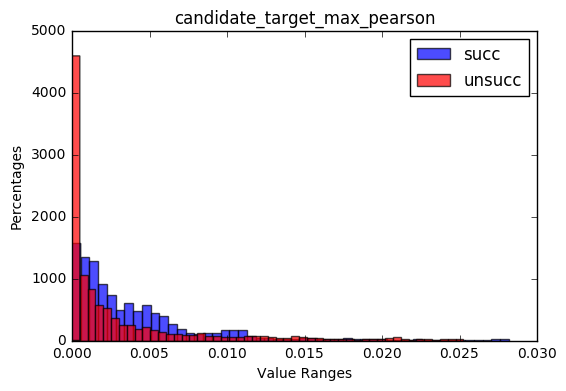

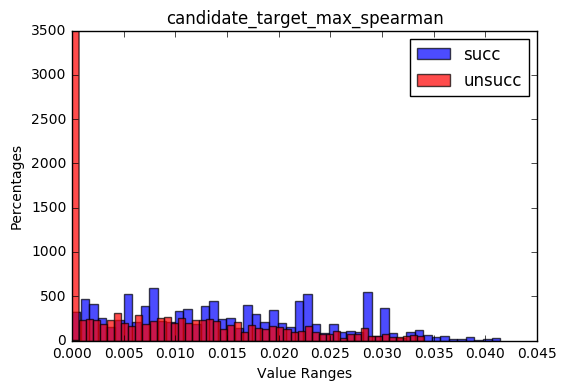

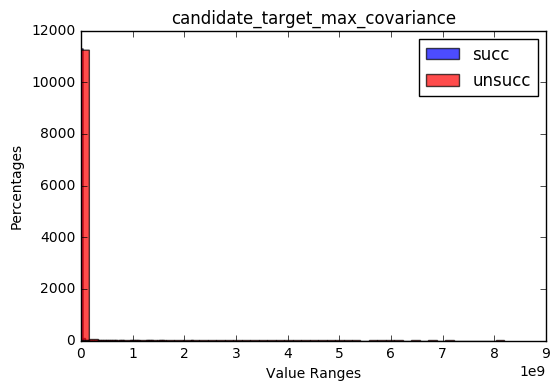

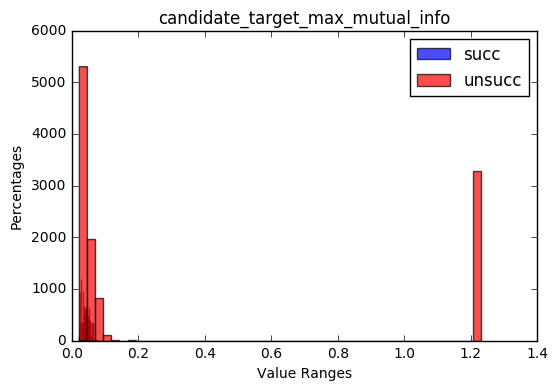

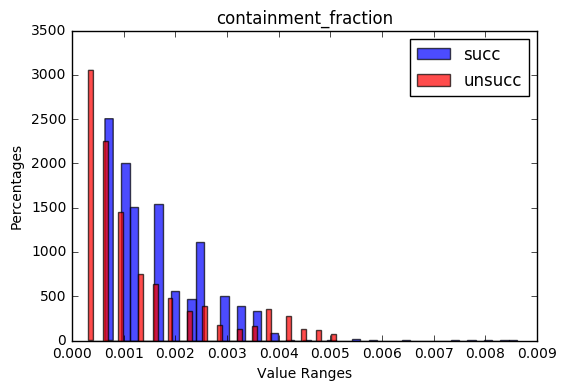

In [69]:
succ = poverty_original.loc[poverty_original['class'] == 'gain'].sample(n=11500)
unsucc = poverty_original.loc[poverty_original['class'] == 'loss'].sample(n=11500)
plot_two_kinds_of_histograms(succ, 'succ', unsucc, 'unsucc')

#### Now, let's just check for taxi.

/Users/alibezz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars


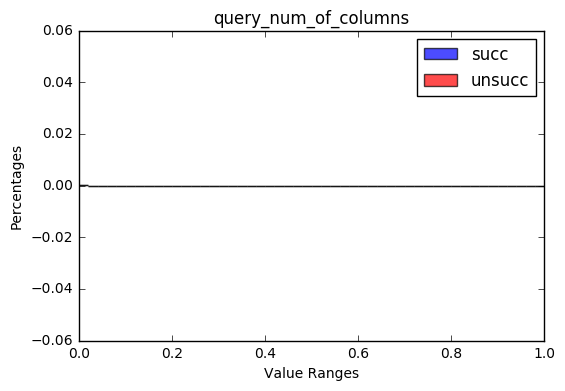

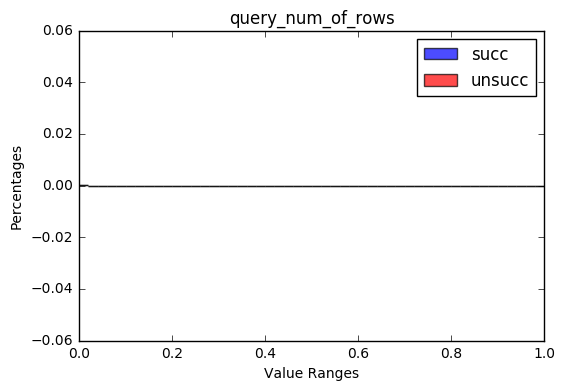

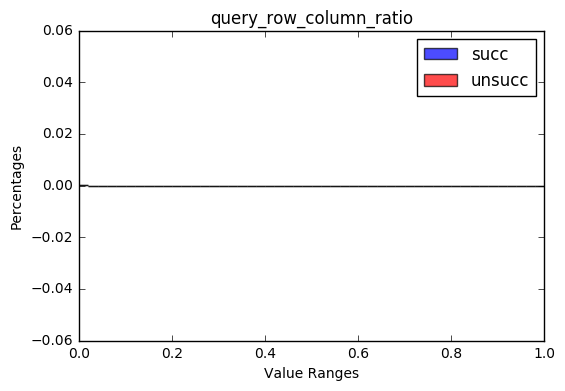

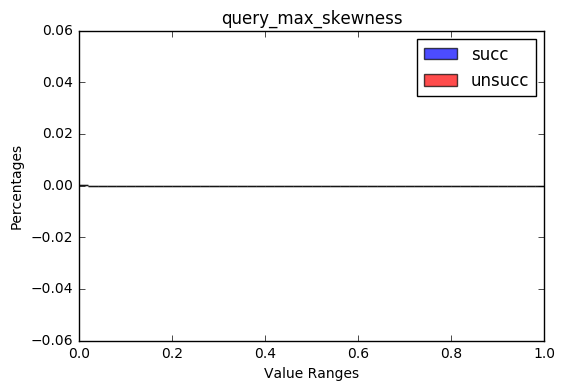

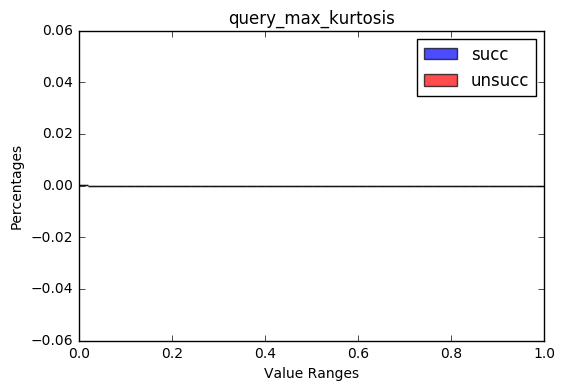

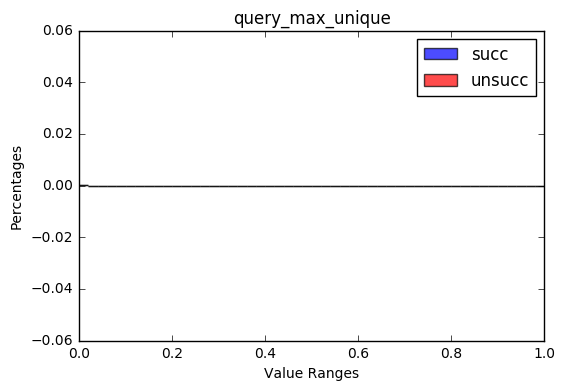

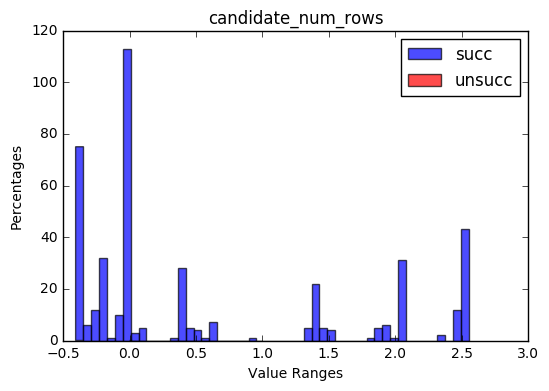

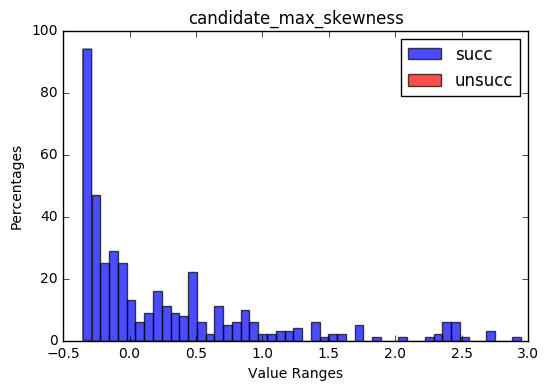

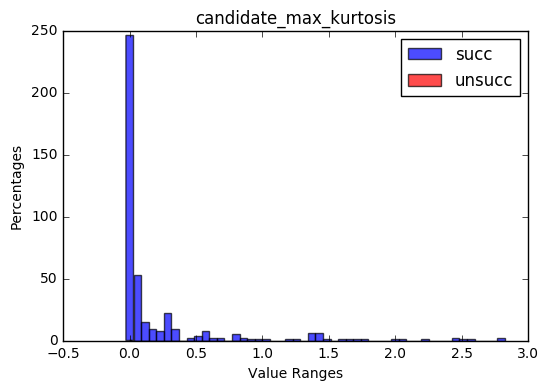

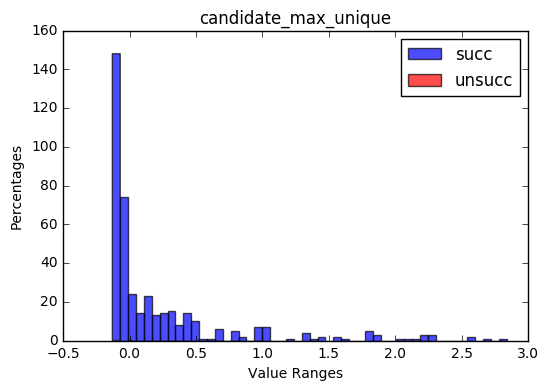

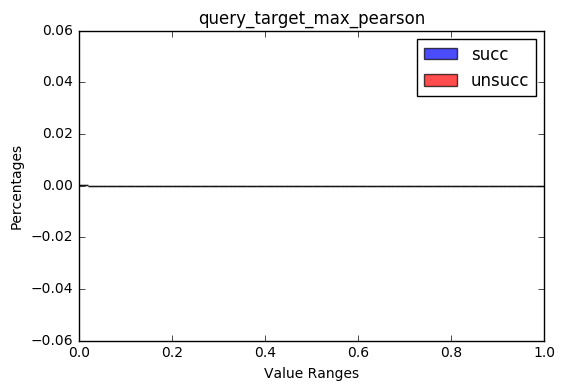

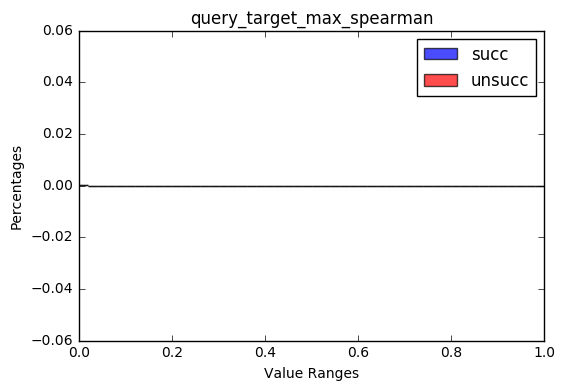

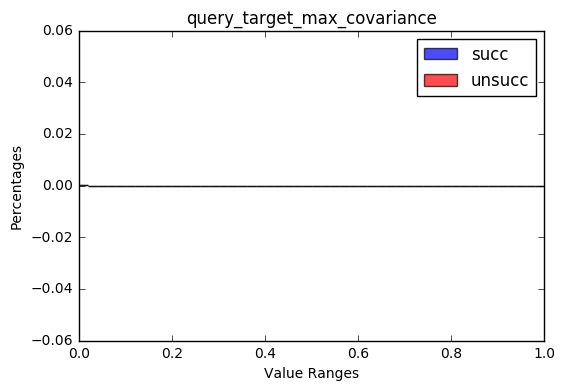

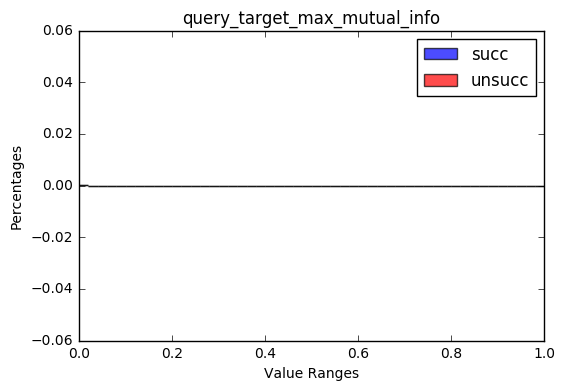

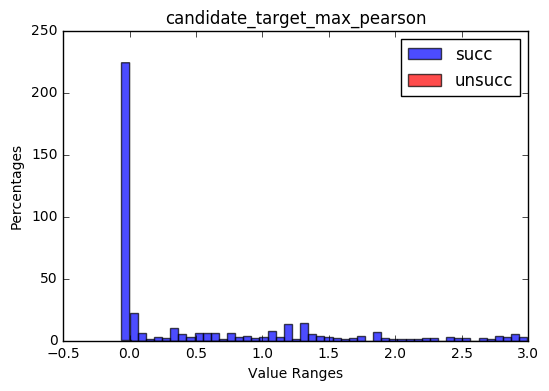

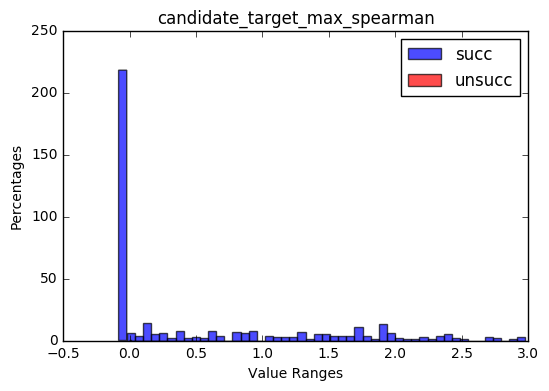

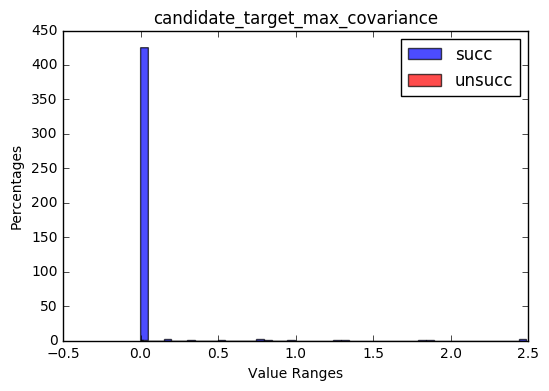

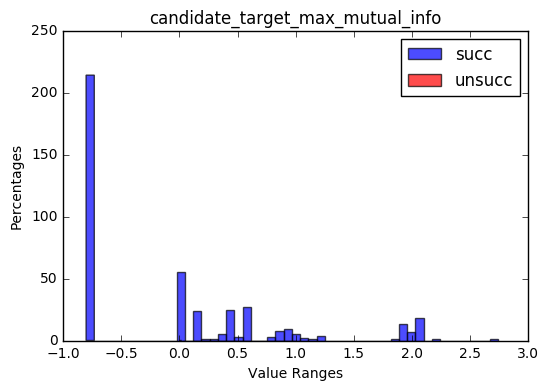

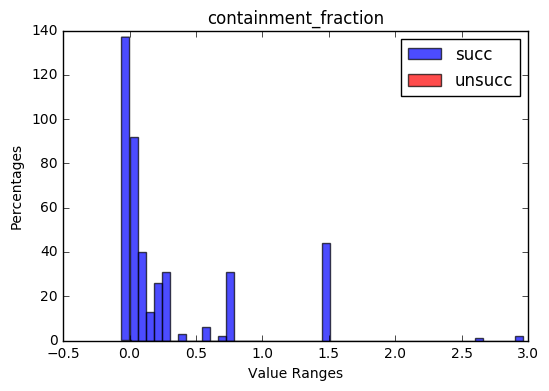

In [71]:
succ = taxi.loc[taxi['class'] == 'gain']
unsucc = taxi.loc[taxi['class'] == 'loss']
plot_two_kinds_of_histograms(succ, 'succ', unsucc, 'unsucc')

/Users/alibezz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars


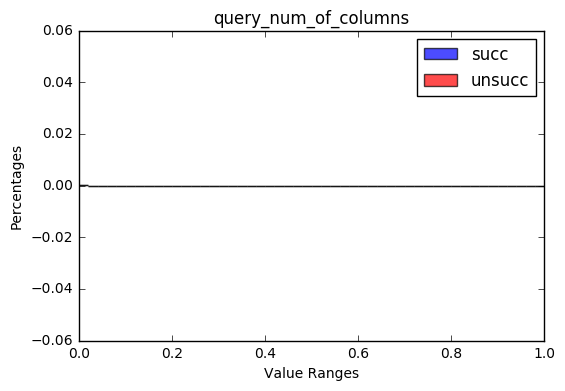

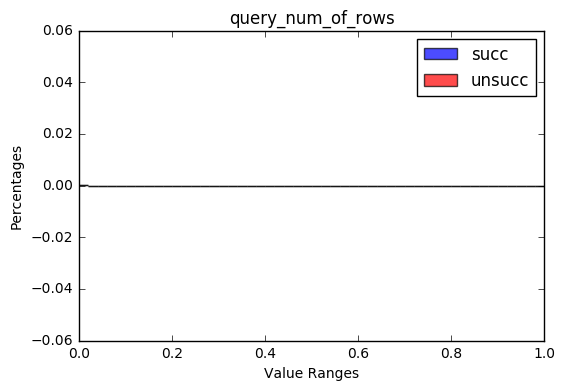

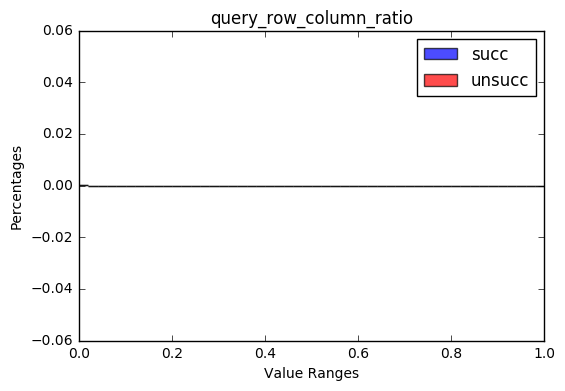

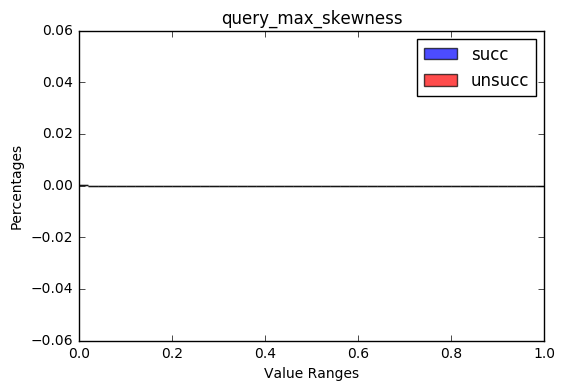

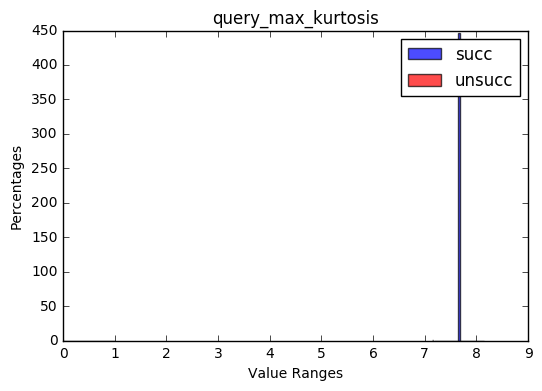

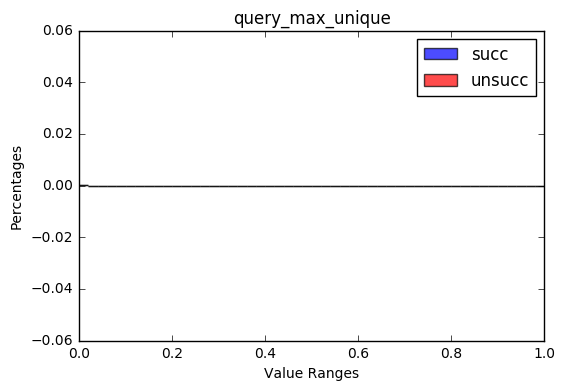

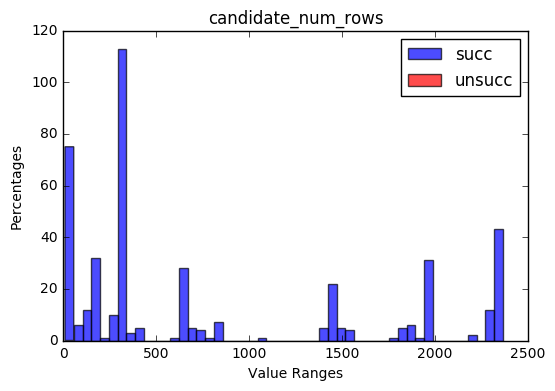

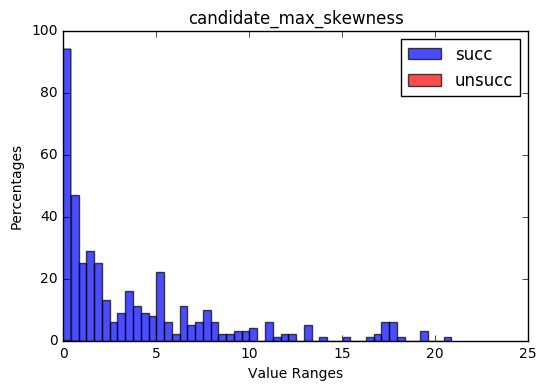

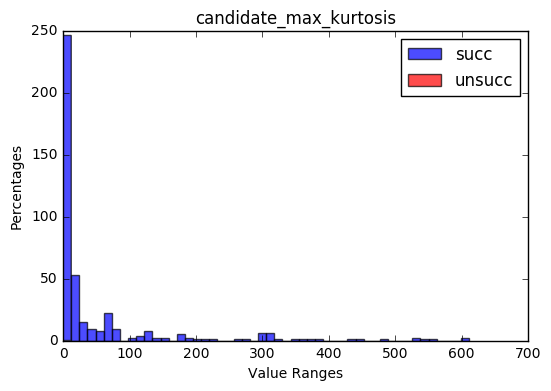

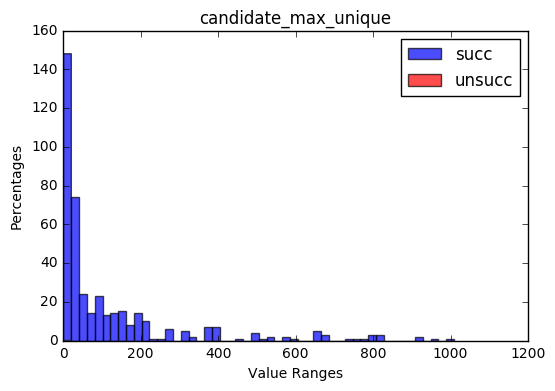

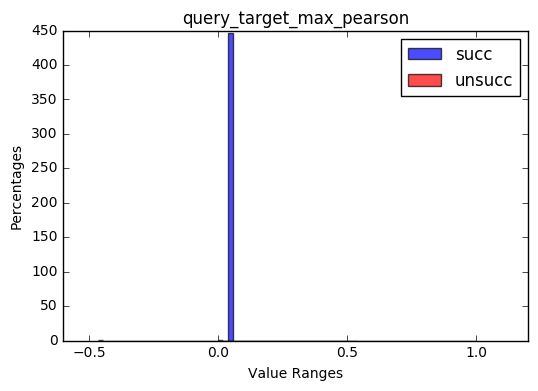

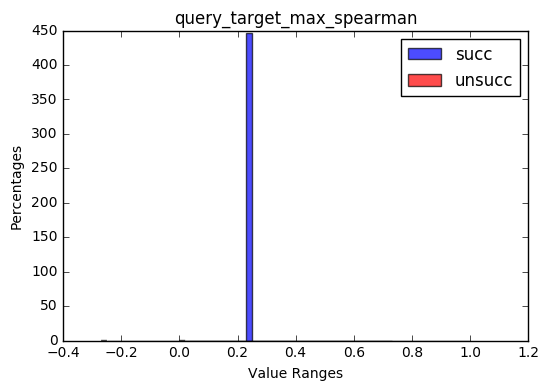

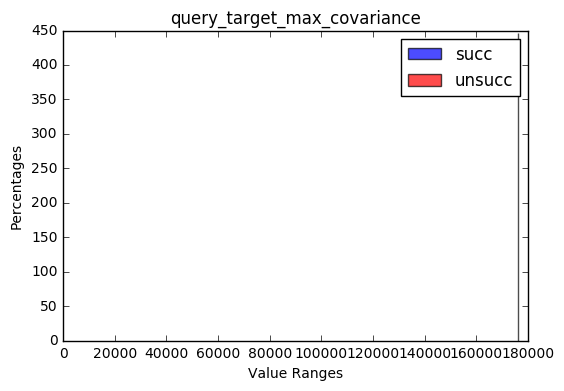

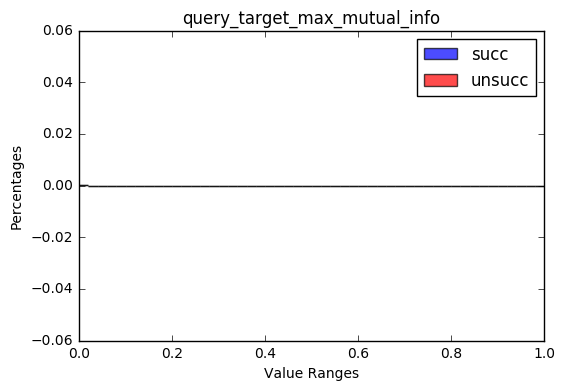

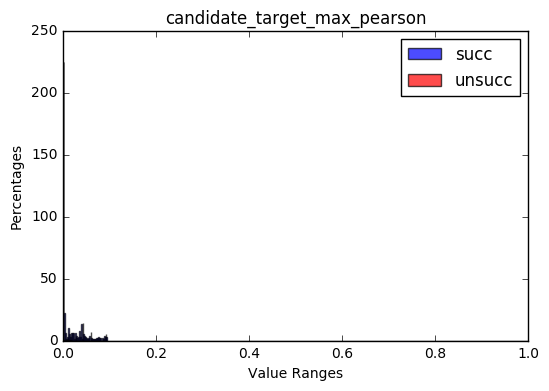

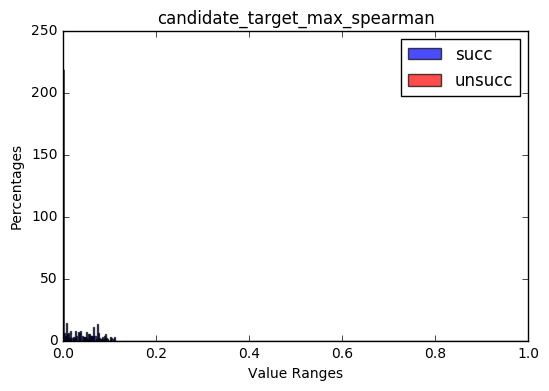

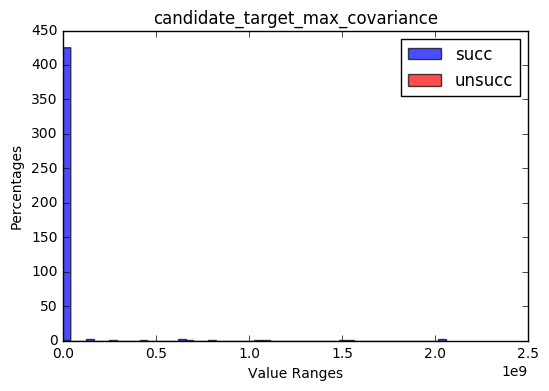

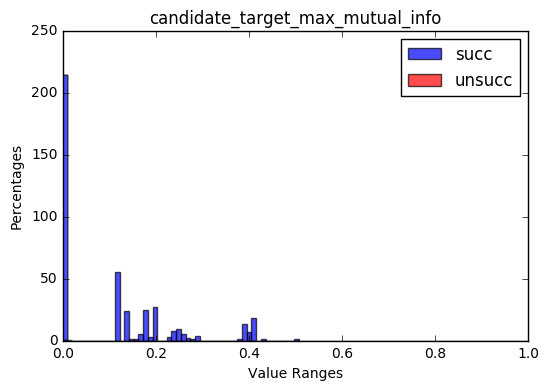

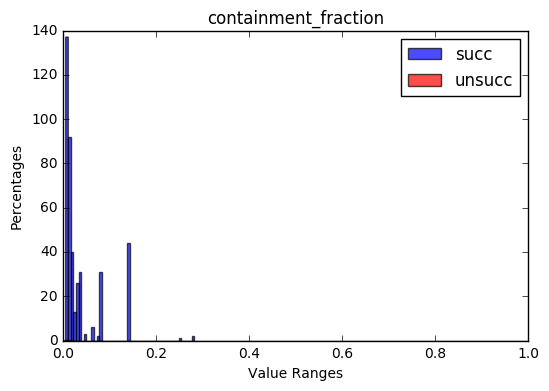

In [72]:
succ = taxi_original.loc[taxi_original['class'] == 'gain']
unsucc = taxi_original.loc[taxi_original['class'] == 'loss']
plot_two_kinds_of_histograms(succ, 'succ', unsucc, 'unsucc')

#### I think the separation is somewhat worse for poverty, at least for most features (no separation occurs for taxi because there are no negative examples). But at least the scale is compatible with other datasets'... Let's see what happens when we train over poverty normalized...

In [76]:
rf_poverty = RandomForestClassifier(n_estimators=100, random_state=42)
rf_poverty.fit(poverty[FEATURES], poverty['class'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [77]:
print(sorted([(feature, value) for feature, value in zip(FEATURES, rf_poverty.feature_importances_)], key=lambda x: x[1], reverse=True))

[('query_target_max_covariance', 0.54960796325508599), ('candidate_target_max_mutual_info', 0.113224372972555), ('containment_fraction', 0.09739199314555344), ('candidate_target_max_pearson', 0.064274412068838591), ('candidate_target_max_spearman', 0.05603622314435705), ('candidate_num_rows', 0.05508859159365951), ('candidate_max_unique', 0.026311950313619836), ('candidate_target_max_covariance', 0.013264744694604645), ('candidate_max_kurtosis', 0.012488739215144908), ('candidate_max_skewness', 0.012311009596581303), ('query_num_of_columns', 0.0), ('query_num_of_rows', 0.0), ('query_row_column_ratio', 0.0), ('query_max_skewness', 0.0), ('query_max_kurtosis', 0.0), ('query_max_unique', 0.0), ('query_target_max_pearson', 0.0), ('query_target_max_spearman', 0.0), ('query_target_max_mutual_info', 0.0)]


#### Let me debug poverty --- it should have only one query dataset! (Same with college, honestly)

In [81]:
set(poverty['query'])

{'0f5efe5c-8140-4e11-85c6-cc62cb992b9a',
 '4c20bd6c-2c24-4ffb-a4f2-7e87de2b9e35',
 '4c6a46b4-3fea-484a-940d-5843b348da08',
 '6a409520-470e-4614-9319-b90d95803daf',
 '78cefd6f-5026-4ffa-b481-af8d881239d9',
 '890817eb-be2a-4696-81b0-b46a5937f0f5',
 'a2ed58ae-f1af-4874-a204-f09967b4131d',
 'c943bc01-8a4d-40f3-81fc-24378450de29',
 'cee25b62-0fbf-4485-b83a-37b1d77fca09',
 'd54e693f-5716-4823-9cea-4bbed9d4e9c4',
 'dedfb5cb-dd8d-4e4e-91b7-2243efa64a26',
 'f91f3117-7fe4-4f42-b550-a2d6bf450c80'}

In [82]:
poverty.loc[poverty['query'] == '0f5efe5c-8140-4e11-85c6-cc62cb992b9a'].sample(n=2)

query       target  \
86735  0f5efe5c-8140-4e11-85c6-cc62cb992b9a  POVALL_2016   
95443  0f5efe5c-8140-4e11-85c6-cc62cb992b9a  POVALL_2016   

                                  candidate  mark  query_num_of_columns  \
86735  18bb6967-ae55-45ec-a4a1-aa4c147b6af7   NaN                   0.0   
95443  d414a5b3-0f56-4aef-a19d-7e8cb88c38dd   NaN                   0.0   

       query_num_of_rows  query_row_column_ratio  query_max_mean  \
86735                0.0                     0.0     14115.71014   
95443                0.0                     0.0     14115.71014   

       query_max_outlier_percentage  query_max_skewness  ...    \
86735                       0.02264                 0.0  ...     
95443                       0.02264                 0.0  ...     

       candidate_target_max_mutual_info  max_pearson_difference  \
86735                         -0.050048               -0.296044   
95443                         -0.012114               -0.287627   

       containment_fraction  decrease_in_mae  decrease_in_mse  \
86735             -0.185598        -0.161628        -0.190018   
95443              0.371196        -0.161768        -0.192245   

       decrease_in_medae  gain_in_r2_score  r2_score_before   r2_score_after  \
86735          -0.073600         -0.299671         0.401915         0.281472   
95443          -0.044292         -0.294754         0.401915         0.283449   

       class  
86735   loss  
95443   loss  

[2 rows x 37 columns]

In [84]:
poverty_original.loc[poverty_original['query'] == 'c943bc01-8a4d-40f3-81fc-24378450de29'].sample(n=2)

query       target  \
5898   c943bc01-8a4d-40f3-81fc-24378450de29  POVALL_2016   
10307  c943bc01-8a4d-40f3-81fc-24378450de29  POVALL_2016   

                                  candidate  mark  query_num_of_columns  \
5898   2b651d7a-09e7-4a71-894b-6e030fa4e408   NaN                  43.0   
10307  fa7be516-bfba-40a3-802c-4e453b9526c0   NaN                  43.0   

       query_num_of_rows  query_row_column_ratio  query_max_mean  \
5898              3136.0               72.930233     14115.71014   
10307             3136.0               72.930233     14115.71014   

       query_max_outlier_percentage  query_max_skewness  ...    \
5898                        0.02264           15.940804  ...     
10307                       0.02264           15.940804  ...     

       candidate_target_max_mutual_info  max_pearson_difference  \
5898                           1.230469               -0.297239   
10307                          0.044447               -0.279665   

       containment_fraction  decrease_in_mae  decrease_in_mse  \
5898               0.003189        -0.161628        -0.190018   
10307              0.001913        -0.163527        -0.185551   

       decrease_in_medae  gain_in_r2_score  r2_score_before   r2_score_after  \
5898           -0.073600         -0.299671         0.401915         0.281472   
10307          -0.073679         -0.309530         0.401915         0.277510   

       class  
5898    loss  
10307   loss  

[2 rows x 37 columns]

#### I have to check why there's more than one query. It doesn't make sense. But let me just check the results I was getting with the original version of poverty.

In [85]:
rf_poverty_original = RandomForestClassifier(n_estimators=100, random_state=42)
rf_poverty_original.fit(poverty_original[FEATURES], poverty_original['class'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [86]:
print(sorted([(feature, value) for feature, value in zip(FEATURES, rf_poverty_original.feature_importances_)], key=lambda x: x[1], reverse=True))

[('candidate_target_max_spearman', 0.20071414551983074), ('candidate_target_max_mutual_info', 0.18720951769515032), ('candidate_target_max_pearson', 0.16328095128794956), ('candidate_num_rows', 0.11522687918870228), ('containment_fraction', 0.085077581986379811), ('candidate_target_max_covariance', 0.077344635379532886), ('candidate_max_unique', 0.068031969748050064), ('candidate_max_skewness', 0.052219224461296149), ('candidate_max_kurtosis', 0.05089509473310825), ('query_num_of_columns', 0.0), ('query_num_of_rows', 0.0), ('query_row_column_ratio', 0.0), ('query_max_skewness', 0.0), ('query_max_kurtosis', 0.0), ('query_max_unique', 0.0), ('query_target_max_pearson', 0.0), ('query_target_max_spearman', 0.0), ('query_target_max_covariance', 0.0), ('query_target_max_mutual_info', 0.0)]


In [87]:
set(poverty['query_target_max_covariance'])

{0.0,
 1.7176110980484365,
 1.8752189507048127,
 2.2220465326406145,
 2.4074121487550406,
 2.4722836446816623,
 2.5162464608332207,
 4.17295188556567,
 4.3167377904220015,
 4.489117983963345,
 4.516666666666667,
 7.269760125835629,
 214.20408163265304}

In [88]:
set(poverty_original['query_target_max_covariance'])

{55411.93727772148, 55411.9372777215}

In [89]:
poverty.loc[poverty['query_target_max_covariance'] == 1.7176110980484365]

query       target  \
98706   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98712   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98715   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98719   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98722   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98723   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98725   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98726   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98727   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98730   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98731   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98736   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98738   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98741   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98742   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98755   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98756   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98759   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98770   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98776   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98784   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98797   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98802   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98806   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98807   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98809   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98810   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98812   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98815   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
98820   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
...                                      ...          ...   
108339  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108340  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108345  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108346  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108349  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108357  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108359  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108369  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108372  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108375  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108376  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108381  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108385  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108389  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108393  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108400  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108405  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108406  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108410  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108411  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108412  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108417  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108419  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108422  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108424  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108430  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108435  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108437  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108440  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
108441  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   

                                   candidate  mark  query_num_of_columns  \
98706   7a8e7093-c8c6-4512-8248-c05bb00ec668   NaN                   0.0   
98712   c181c0b1-e861-451e-afa8-b76413e8f4c8   NaN                   0.0   
98715   609a20fb-cc1d-4c15-a

In [91]:
poverty_original.loc[poverty_original['query'] == 'f91f3117-7fe4-4f42-b550-a2d6bf450c80']

query       target  \
94322   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94323   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94324   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94325   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94326   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94327   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94328   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94329   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94330   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94331   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94332   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94333   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94334   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94335   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94336   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94337   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94338   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94339   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94340   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94341   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94342   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94343   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94344   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94345   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94346   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94347   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94348   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94349   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94350   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
94351   f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
...                                      ...          ...   
104032  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104033  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104034  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104035  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104036  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104037  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104038  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104039  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104040  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104041  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104042  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104043  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104044  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104045  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104046  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104047  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104048  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104049  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104050  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104051  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104052  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104053  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104054  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104055  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104056  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104057  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104058  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104059  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104060  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   
104061  f91f3117-7fe4-4f42-b550-a2d6bf450c80  POVALL_2016   

                                   candidate  mark  query_num_of_columns  \
94322   7a8e7093-c8c6-4512-8248-c05bb00ec668   NaN                  43.0   
94323   a1ea20c2-4e8b-46fd-9876-4558cc1500b1   NaN                  43.0   
94324   a1ea20c2-4e8b-46fd-9

In [92]:
poverty.shape

(130928, 37)

In [93]:
poverty_original.shape

(130928, 37)

In [94]:
college_original_preds = rf_poverty_original.predict(college_original[FEATURES])
print(classification_report(college_original['class'], college_original_preds))

              precision    recall  f1-score   support

        gain       0.70      0.89      0.78       130
        loss       0.99      0.95      0.97       973

   micro avg       0.94      0.94      0.94      1103
   macro avg       0.84      0.92      0.88      1103
weighted avg       0.95      0.94      0.94      1103



In [95]:
college_preds = rf_poverty.predict(college[FEATURES])
print(classification_report(college['class'], college_preds))

              precision    recall  f1-score   support

        gain       0.00      0.00      0.00       130
        loss       0.83      0.66      0.74       973

   micro avg       0.58      0.58      0.58      1103
   macro avg       0.42      0.33      0.37      1103
weighted avg       0.73      0.58      0.65      1103



#### Ok. There are a few problems here that we need to sort out. 
#### 1 - Something is wrong with poverty --- too many queries, and weird containment ratios
#### 2 - Maybe we should normalize the data in a different way?
#### 3 - Openml_train has features that are too mixed. We should clean them.

In [97]:
set(poverty_original['query'])

{'0f5efe5c-8140-4e11-85c6-cc62cb992b9a',
 '4c20bd6c-2c24-4ffb-a4f2-7e87de2b9e35',
 '4c6a46b4-3fea-484a-940d-5843b348da08',
 '6a409520-470e-4614-9319-b90d95803daf',
 '78cefd6f-5026-4ffa-b481-af8d881239d9',
 '890817eb-be2a-4696-81b0-b46a5937f0f5',
 'a2ed58ae-f1af-4874-a204-f09967b4131d',
 'c943bc01-8a4d-40f3-81fc-24378450de29',
 'cee25b62-0fbf-4485-b83a-37b1d77fca09',
 'd54e693f-5716-4823-9cea-4bbed9d4e9c4',
 'dedfb5cb-dd8d-4e4e-91b7-2243efa64a26',
 'f91f3117-7fe4-4f42-b550-a2d6bf450c80'}

In [98]:
poverty_original.loc[poverty_original['query'] == '0f5efe5c-8140-4e11-85c6-cc62cb992b9a'].sample(n=1)

query       target  \
82741  0f5efe5c-8140-4e11-85c6-cc62cb992b9a  POVALL_2016   

                                  candidate  mark  query_num_of_columns  \
82741  224d1d52-4ac0-42c9-9528-923a8bb12481   NaN                  43.0   

       query_num_of_rows  query_row_column_ratio  query_max_mean  \
82741             3136.0               72.930233     14115.71014   

       query_max_outlier_percentage  query_max_skewness  ...    \
82741                       0.02264           15.940804  ...     

       candidate_target_max_mutual_info  max_pearson_difference  \
82741                          0.041448               -0.296089   

       containment_fraction  decrease_in_mae  decrease_in_mse  \
82741              0.001594        -0.165763        -0.191212   

       decrease_in_medae  gain_in_r2_score  r2_score_before   r2_score_after  \
82741          -0.069375         -0.297036         0.401915         0.282532   

       class  
82741   loss  

[1 rows x 37 columns]

In [99]:
poverty_original.loc[poverty_original['query'] == 'dedfb5cb-dd8d-4e4e-91b7-2243efa64a26'].sample(n=1)

query       target  \
18516  dedfb5cb-dd8d-4e4e-91b7-2243efa64a26  POVALL_2016   

                                  candidate  mark  query_num_of_columns  \
18516  97bb21c2-122e-4385-9bc7-a87d1e11f8f8   NaN                  43.0   

       query_num_of_rows  query_row_column_ratio  query_max_mean  \
18516             3136.0               72.930233     14115.71014   

       query_max_outlier_percentage  query_max_skewness  ...    \
18516                       0.02264           15.940804  ...     

       candidate_target_max_mutual_info  max_pearson_difference  \
18516                          0.027043               -0.296511   

       containment_fraction  decrease_in_mae  decrease_in_mse  \
18516              0.000638         -0.16178        -0.183739   

       decrease_in_medae  gain_in_r2_score  r2_score_before   r2_score_after  \
18516          -0.065666         -0.313528         0.401915         0.275903   

       class  
18516   loss  

[1 rows x 37 columns]

In [100]:
poverty_original.loc[poverty_original['query'] == '4c6a46b4-3fea-484a-940d-5843b348da08'].sample(n=1)

query       target  \
85930  4c6a46b4-3fea-484a-940d-5843b348da08  POVALL_2016   

                                  candidate  mark  query_num_of_columns  \
85930  1e371261-5c72-4b51-accf-72a8e2786429   NaN                  43.0   

       query_num_of_rows  query_row_column_ratio  query_max_mean  \
85930             3136.0               72.930233     14115.71014   

       query_max_outlier_percentage  query_max_skewness  ...    \
85930                       0.02264           15.940804  ...     

       candidate_target_max_mutual_info  max_pearson_difference  \
85930                          1.230469               -0.297239   

       containment_fraction  decrease_in_mae  decrease_in_mse  \
85930              0.000319        -0.161628        -0.190018   

       decrease_in_medae  gain_in_r2_score  r2_score_before   r2_score_after  \
85930            -0.0736         -0.299671         0.401915         0.281472   

       class  
85930   loss  

[1 rows x 37 columns]

In [101]:
set(poverty_original['query_num_of_columns'])

{43.0}

In [102]:
set(poverty['query_num_of_columns'])

{0.0}

#### Ok, so it seems like there is in fact only one query, but it got different names probably because of the way I processed them on spark. Let me fix this on both files (offline; it takes forever on the notebook).

In [106]:
poverty_original['query'] = ['0f5efe5c-8140-4e11-85c6-cc62cb992b9a' for index, row in poverty_original.iterrows()]

In [108]:
f = open('poverty-estimation-results-features-and-targets-training.csv', 'w')
f.write(poverty_original.to_csv(index=False))
f.close()

In [111]:
set(poverty['query'])

{'0f5efe5c-8140-4e11-85c6-cc62cb992b9a'}

In [116]:
poverty = pd.read_csv('poverty-estimation-results-features-and-targets-training-normalized-with-mad.csv')

In [117]:
rf_poverty = RandomForestClassifier(n_estimators=100, random_state=42)
rf_poverty.fit(poverty[FEATURES], poverty['class'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [118]:
print(sorted([(feature, value) for feature, value in zip(FEATURES, rf_poverty.feature_importances_)], key=lambda x: x[1], reverse=True))

[('candidate_target_max_spearman', 0.21013840050484764), ('candidate_target_max_mutual_info', 0.19213951273354829), ('candidate_target_max_pearson', 0.17250392138635348), ('candidate_num_rows', 0.11658137918619101), ('containment_fraction', 0.089305737512021366), ('candidate_max_unique', 0.070422049038212031), ('candidate_max_skewness', 0.054701823931728476), ('candidate_max_kurtosis', 0.053048551245432521), ('candidate_target_max_covariance', 0.041158624461665232), ('query_num_of_columns', 0.0), ('query_num_of_rows', 0.0), ('query_row_column_ratio', 0.0), ('query_max_skewness', 0.0), ('query_max_kurtosis', 0.0), ('query_max_unique', 0.0), ('query_target_max_pearson', 0.0), ('query_target_max_spearman', 0.0), ('query_target_max_covariance', 0.0), ('query_target_max_mutual_info', 0.0)]


#### Ok, now poverty makes sense. Let me replot the features and see how this model performs.

/Users/alibezz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars


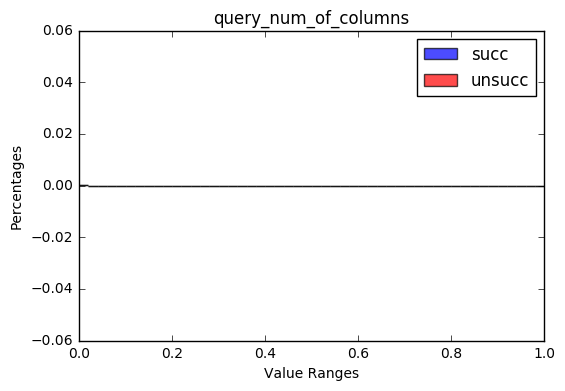

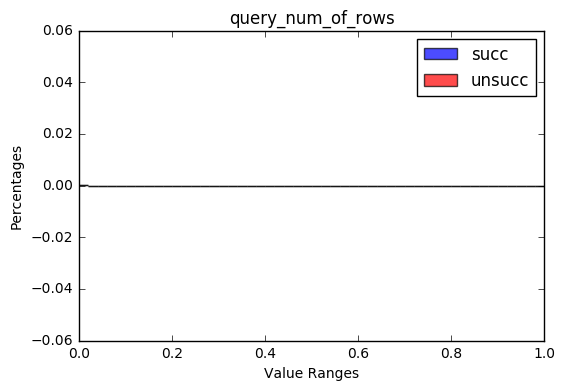

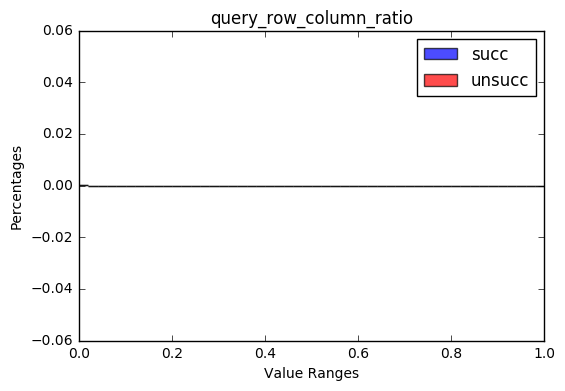

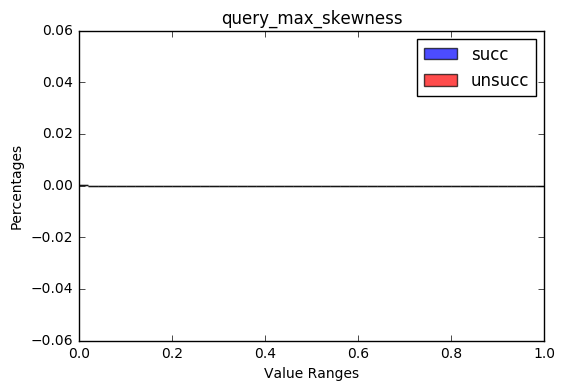

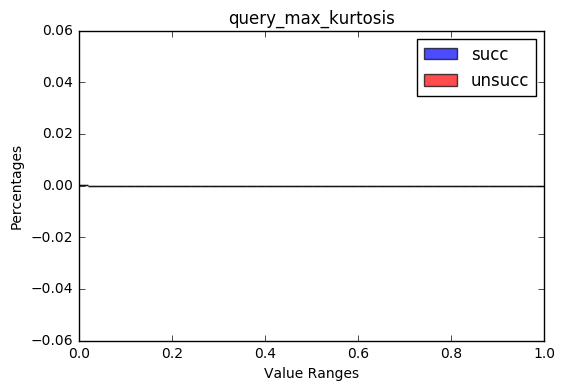

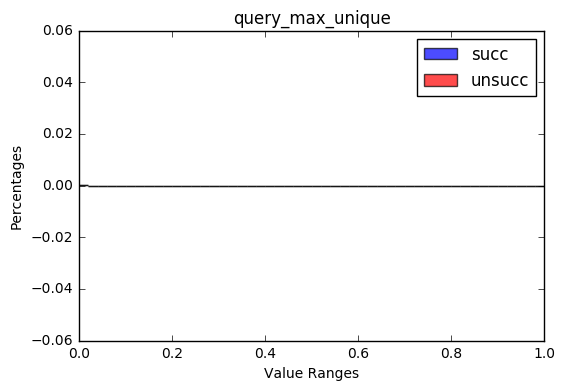

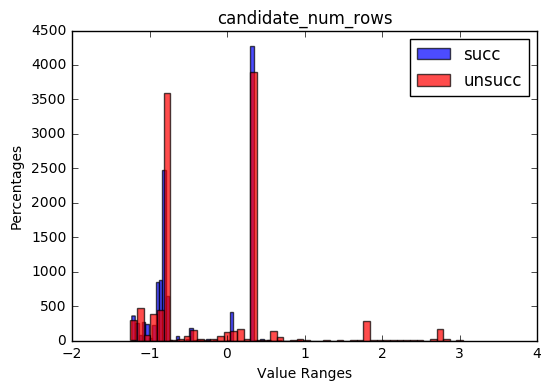

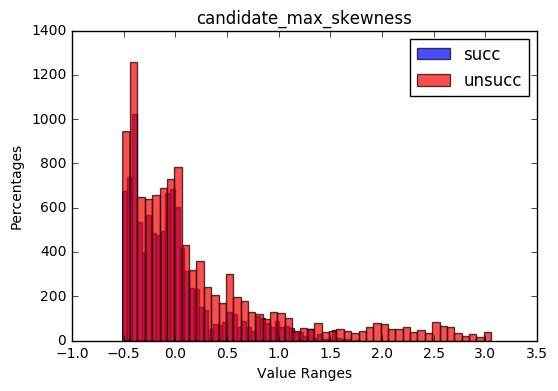

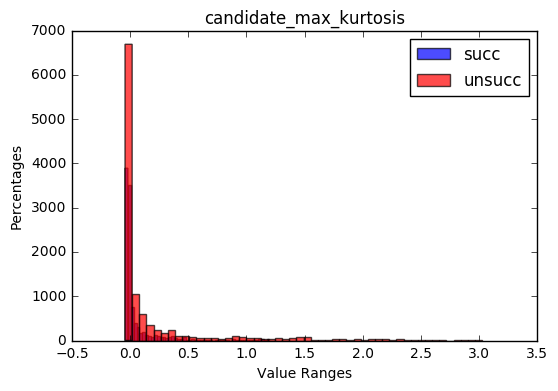

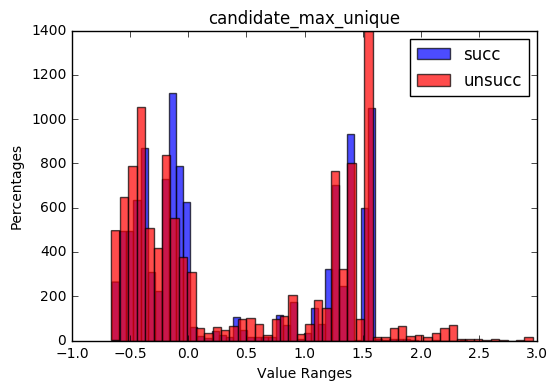

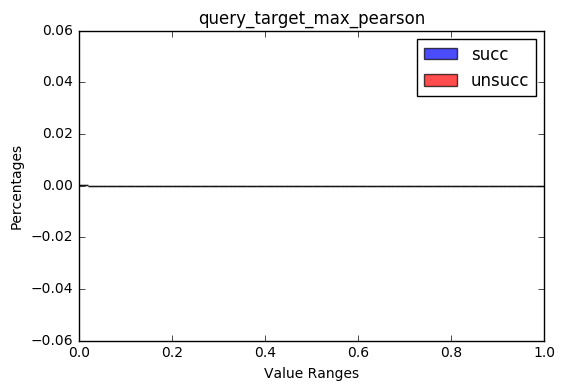

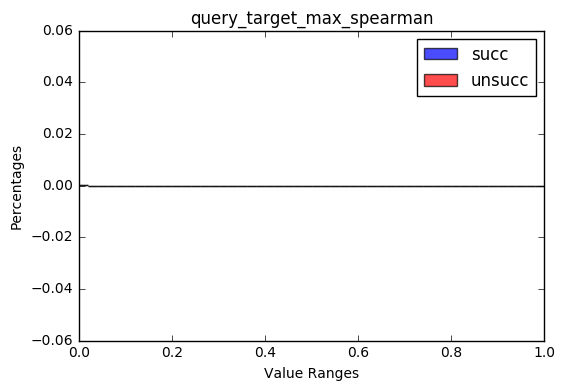

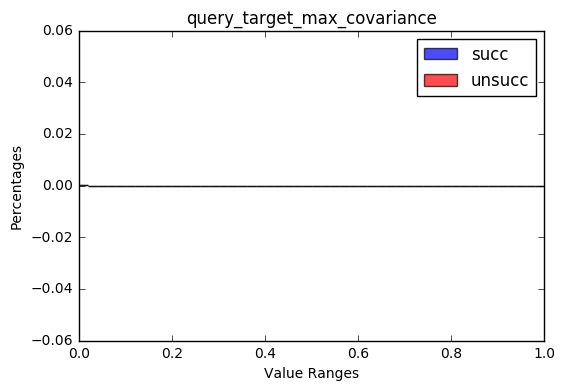

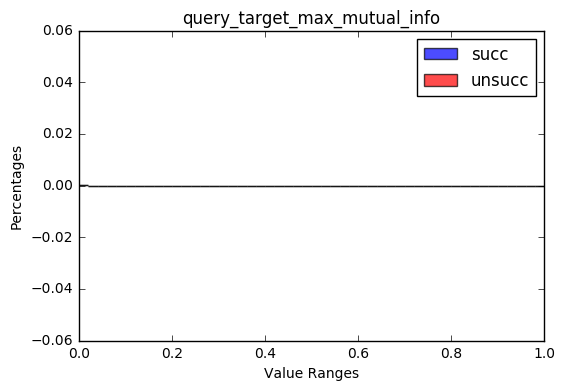

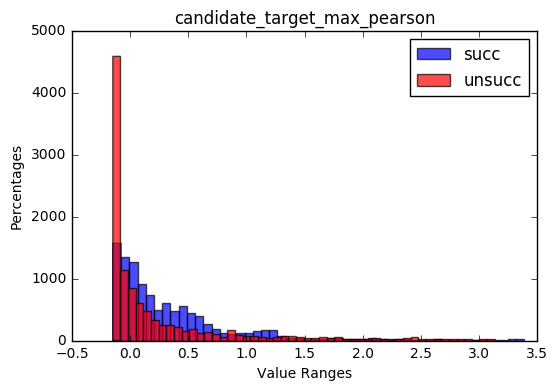

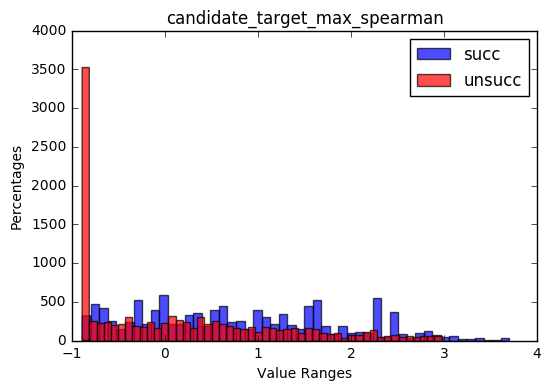

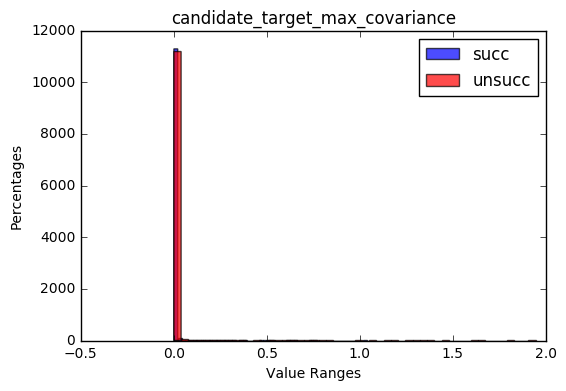

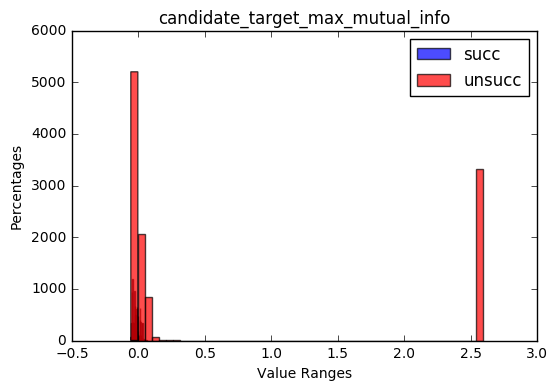

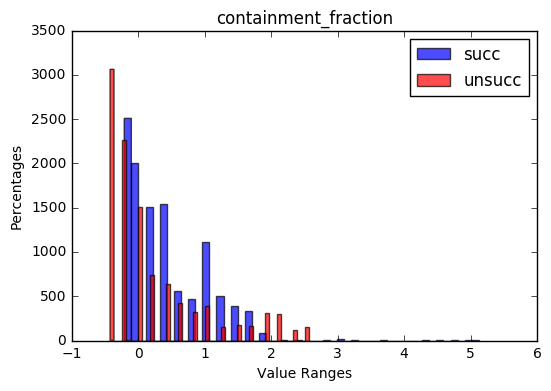

In [119]:
succ = poverty.loc[poverty['class'] == 'gain'].sample(n=11500)
unsucc = poverty.loc[poverty['class'] == 'loss'].sample(n=11500)
plot_two_kinds_of_histograms(succ, 'succ', unsucc, 'unsucc')

#### Definitely not very discriminating either...

In [120]:
college_preds = rf_poverty.predict(college[FEATURES])
print(classification_report(college['class'], college_preds))

              precision    recall  f1-score   support

        gain       0.00      0.00      0.00       130
        loss       0.88      1.00      0.94       973

   micro avg       0.88      0.88      0.88      1103
   macro avg       0.44      0.50      0.47      1103
weighted avg       0.78      0.88      0.83      1103



In [121]:
poverty_original = pd.read_csv('poverty-estimation-results-features-and-targets-training.csv')
rf_poverty_original = RandomForestClassifier(n_estimators=100, random_state=42)
rf_poverty_original.fit(poverty_original[FEATURES], poverty_original['class'])
print(sorted([(feature, value) for feature, value in zip(FEATURES, rf_poverty_original.feature_importances_)], key=lambda x: x[1], reverse=True))

[('candidate_target_max_spearman', 0.20071414551983074), ('candidate_target_max_mutual_info', 0.18720951769515032), ('candidate_target_max_pearson', 0.16328095128794956), ('candidate_num_rows', 0.11522687918870228), ('containment_fraction', 0.085077581986379811), ('candidate_target_max_covariance', 0.077344635379532886), ('candidate_max_unique', 0.068031969748050064), ('candidate_max_skewness', 0.052219224461296149), ('candidate_max_kurtosis', 0.05089509473310825), ('query_num_of_columns', 0.0), ('query_num_of_rows', 0.0), ('query_row_column_ratio', 0.0), ('query_max_skewness', 0.0), ('query_max_kurtosis', 0.0), ('query_max_unique', 0.0), ('query_target_max_pearson', 0.0), ('query_target_max_spearman', 0.0), ('query_target_max_covariance', 0.0), ('query_target_max_mutual_info', 0.0)]


In [123]:
college_original_preds = rf_poverty_original.predict(college_original[FEATURES])
print(classification_report(college_original['class'], college_original_preds))

              precision    recall  f1-score   support

        gain       0.70      0.89      0.78       130
        loss       0.99      0.95      0.97       973

   micro avg       0.94      0.94      0.94      1103
   macro avg       0.84      0.92      0.88      1103
weighted avg       0.95      0.94      0.94      1103



#### As discussed last week, these results are good almost by chance. The scales were very different. Now let's quickly debug the containment fraction of poverty. (I'll do a more detailed analysis soon)

In [131]:
sample = poverty_original.sample(n=5)
for index, row in sample.iterrows():
    print(row)
    print('***')

query                               0f5efe5c-8140-4e11-85c6-cc62cb992b9a
target                                                       POVALL_2016
candidate                           cc8a4f07-c72b-4cf2-81c4-1a4ec349e47b
mark                                                                 NaN
query_num_of_columns                                                  43
query_num_of_rows                                                   3136
query_row_column_ratio                                           72.9302
query_max_mean                                                   14115.7
query_max_outlier_percentage                                   0.0226403
query_max_skewness                                               15.9408
query_max_kurtosis                                                401.99
query_max_unique                                                    2790
candidate_num_of_columns                                               1
candidate_num_rows                                 

In [138]:
large_candidates = poverty_original.loc[poverty_original['candidate_num_rows'] > 2000]
sample = large_candidates.sample(n=5)
for index, row in sample.iterrows():
    print(row)
    print('***')

query                               0f5efe5c-8140-4e11-85c6-cc62cb992b9a
target                                                       POVALL_2016
candidate                           1a38b942-693d-4571-8133-83a991dd50a3
mark                                                                 NaN
query_num_of_columns                                                  43
query_num_of_rows                                                   3136
query_row_column_ratio                                           72.9302
query_max_mean                                                   14115.7
query_max_outlier_percentage                                   0.0226403
query_max_skewness                                               15.9408
query_max_kurtosis                                                401.99
query_max_unique                                                    2790
candidate_num_of_columns                                               1
candidate_num_rows                                 

In [142]:
total_intersection = poverty_original.loc[poverty_original['containment_fraction'] == 1.0]

In [143]:
total_intersection.loc[total_intersection['class'] == 'gain'].shape

(11, 37)

In [144]:
total_intersection.shape

(11, 37)

In [146]:
for index, row in total_intersection.iterrows():
    print(row)
    print('***')

query                               0f5efe5c-8140-4e11-85c6-cc62cb992b9a
target                                                       POVALL_2016
candidate                           cc3c779d-fe27-443b-bb2b-3010a098014a
mark                                                                 NaN
query_num_of_columns                                                  43
query_num_of_rows                                                   3136
query_row_column_ratio                                           72.9302
query_max_mean                                                   14115.7
query_max_outlier_percentage                                   0.0226403
query_max_skewness                                               15.9408
query_max_kurtosis                                                401.99
query_max_unique                                                    2790
candidate_num_of_columns                                               1
candidate_num_rows                                 

#### Debugging this case study certainly is something that I GOTTA DO TONIGHT, but I still want to understand why these models are not good enough. Is it because we're eliminating all the query features? Let me make a fair comparison then, using openml_train and openml_train_original.

In [147]:
CANDIDATE_FEATURES = ['candidate_num_rows', 'candidate_max_skewness', 'candidate_max_kurtosis', 
                      'candidate_max_unique', 'candidate_target_max_pearson', 'candidate_target_max_spearman', 
                      'candidate_target_max_covariance', 'candidate_target_max_mutual_info', 'containment_fraction']

rf_openml_orig_candidate_features = RandomForestClassifier(n_estimators=100, random_state=42)
rf_openml_orig_candidate_features.fit(openml_train_original[CANDIDATE_FEATURES], openml_train_original['class'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [148]:
college_original_preds = rf_openml_orig_candidate_features.predict(college_original[CANDIDATE_FEATURES])
print(classification_report(college_original['class'], college_original_preds))

              precision    recall  f1-score   support

        gain       0.12      0.65      0.21       130
        loss       0.89      0.38      0.53       973

   micro avg       0.41      0.41      0.41      1103
   macro avg       0.51      0.51      0.37      1103
weighted avg       0.80      0.41      0.49      1103



In [149]:
college_original_preds = rf_original.predict(college_original[FEATURES])
print(classification_report(college_original['class'], college_original_preds))

              precision    recall  f1-score   support

        gain       0.12      0.67      0.21       130
        loss       0.89      0.37      0.52       973

   micro avg       0.40      0.40      0.40      1103
   macro avg       0.51      0.52      0.37      1103
weighted avg       0.80      0.40      0.49      1103



In [150]:
poverty_original_preds = rf_openml_orig_candidate_features.predict(poverty_original[CANDIDATE_FEATURES])
print(classification_report(poverty_original['class'], poverty_original_preds))

              precision    recall  f1-score   support

        gain       0.09      0.72      0.15     11526
        loss       0.91      0.26      0.41    119402

   micro avg       0.30      0.30      0.30    130928
   macro avg       0.50      0.49      0.28    130928
weighted avg       0.84      0.30      0.39    130928



In [151]:
poverty_original_preds = rf_original.predict(poverty_original[FEATURES])
print(classification_report(poverty_original['class'], poverty_original_preds))

              precision    recall  f1-score   support

        gain       0.01      0.02      0.02     11526
        loss       0.90      0.83      0.87    119402

   micro avg       0.76      0.76      0.76    130928
   macro avg       0.46      0.43      0.44    130928
weighted avg       0.82      0.76      0.79    130928



#### With the original datasets, not using query features had a negative impact in the results. Now let's check the results using the normalized openml_train again.

In [153]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(openml_train[FEATURES], openml_train['class'])
poverty_preds = rf.predict(poverty[FEATURES])
print(classification_report(poverty['class'], poverty_preds))

              precision    recall  f1-score   support

        gain       0.12      0.43      0.18     11526
        loss       0.93      0.68      0.78    119402

   micro avg       0.66      0.66      0.66    130928
   macro avg       0.52      0.56      0.48    130928
weighted avg       0.85      0.66      0.73    130928



#### The results do get a bit better for poverty when we use the normalized version of openml_train, despite its smaller number of features. Let's see the results for college and taxi.

In [154]:
college_original_preds = rf_openml_orig_candidate_features.predict(college_original[CANDIDATE_FEATURES])
print(classification_report(college_original['class'], college_original_preds))

              precision    recall  f1-score   support

        gain       0.12      0.65      0.21       130
        loss       0.89      0.38      0.53       973

   micro avg       0.41      0.41      0.41      1103
   macro avg       0.51      0.51      0.37      1103
weighted avg       0.80      0.41      0.49      1103



In [155]:
college_original_preds = rf_original.predict(college_original[FEATURES])
print(classification_report(college_original['class'], college_original_preds))

              precision    recall  f1-score   support

        gain       0.12      0.67      0.21       130
        loss       0.89      0.37      0.52       973

   micro avg       0.40      0.40      0.40      1103
   macro avg       0.51      0.52      0.37      1103
weighted avg       0.80      0.40      0.49      1103



In [156]:
college_preds = rf.predict(college[FEATURES])
print(classification_report(college['class'], college_preds))

              precision    recall  f1-score   support

        gain       0.10      0.50      0.17       130
        loss       0.86      0.41      0.56       973

   micro avg       0.42      0.42      0.42      1103
   macro avg       0.48      0.46      0.36      1103
weighted avg       0.77      0.42      0.51      1103



#### Again, the results are comparable and not very good, despite the normalization.

In [157]:
taxi_original_preds = rf_openml_orig_candidate_features.predict(taxi_original[CANDIDATE_FEATURES])
print(classification_report(taxi_original['class'], taxi_original_preds))

              precision    recall  f1-score   support

        gain       1.00      0.62      0.77       447
        loss       0.00      0.00      0.00         0

   micro avg       0.62      0.62      0.62       447
   macro avg       0.50      0.31      0.38       447
weighted avg       1.00      0.62      0.77       447



In [158]:
taxi_original_preds = rf_original.predict(taxi_original[FEATURES])
print(classification_report(taxi_original['class'], taxi_original_preds))

              precision    recall  f1-score   support

        gain       1.00      0.55      0.71       447
        loss       0.00      0.00      0.00         0

   micro avg       0.55      0.55      0.55       447
   macro avg       0.50      0.28      0.36       447
weighted avg       1.00      0.55      0.71       447



In [159]:
taxi_preds = rf.predict(taxi[FEATURES])
print(classification_report(taxi['class'], taxi_preds))

              precision    recall  f1-score   support

        gain       1.00      0.59      0.74       447
        loss       0.00      0.00      0.00         0

   micro avg       0.59      0.59      0.59       447
   macro avg       0.50      0.30      0.37       447
weighted avg       1.00      0.59      0.74       447



#### For taxi, it seems like it does not make a big difference AGAIN --- which makes me think that we may not need these query features after all (which is great, because 'normalizing' them in real time may not be possible).

#### Jupyter died, so let me reload the datasets and a model built over openml_train using all features, which I just computed offline.

In [9]:
import pickle
rf_openml_train = pickle.load(open('openml_train_normalized_model.sav', 'rb'))

In [11]:
poverty = pd.read_csv('poverty-estimation-results-features-and-targets-training-normalized-with-mad.csv')
poverty_preds = rf_openml_train.predict(poverty[FEATURES])
print(classification_report(poverty['class'], poverty_preds))

              precision    recall  f1-score   support

        gain       0.12      0.43      0.18     11526
        loss       0.93      0.68      0.78    119402

   micro avg       0.66      0.66      0.66    130928
   macro avg       0.52      0.56      0.48    130928
weighted avg       0.85      0.66      0.73    130928



#### Both openml_train and poverty are normalized, but the results are still pretty bad. Let's try to understand why on a local level.

In [13]:
poverty['pred'] = poverty_preds
false_positive = poverty.loc[(poverty['class'] == 'loss') & (poverty['pred'] == 'gain')]
sample_fp = false_positive.sample(2)
false_negative = poverty.loc[(poverty['class'] == 'gain') & (poverty['pred'] == 'loss')]
sample_fn = false_negative.sample(2)
true_positive = poverty.loc[(poverty['class'] == 'gain') & (poverty['pred'] == 'gain')]
sample_tp = true_positive.sample(2)
true_negative = poverty.loc[(poverty['class'] == 'loss') & (poverty['pred'] == 'loss')]
sample_tn = true_negative.sample(2)

import eli5

#### Let's analyze the false positives first

In [15]:
no_bias = lambda feature_name, feature_value: feature_name != '<BIAS>'
eli5.show_prediction(rf_openml_train, sample_fp.iloc[0][FEATURES], 
                     feature_names=FEATURES, 
                     show_feature_values=True, feature_filter=no_bias)

In [16]:
eli5.show_prediction(rf_openml_train, sample_fp.iloc[1][FEATURES], 
                     feature_names=FEATURES, 
                     show_feature_values=True, feature_filter=no_bias)

#### And the true positives...

In [17]:
eli5.show_prediction(rf_openml_train, sample_tp.iloc[0][FEATURES], 
                     feature_names=FEATURES, 
                     show_feature_values=True, feature_filter=no_bias)

In [18]:
eli5.show_prediction(rf_openml_train, sample_tp.iloc[1][FEATURES], 
                     feature_names=FEATURES, 
                     show_feature_values=True, feature_filter=no_bias)

#### Now the false negatives

In [19]:
eli5.show_prediction(rf_openml_train, sample_fn.iloc[0][FEATURES], 
                     feature_names=FEATURES, 
                     show_feature_values=True, feature_filter=no_bias)

In [20]:
eli5.show_prediction(rf_openml_train, sample_fn.iloc[1][FEATURES], 
                     feature_names=FEATURES, 
                     show_feature_values=True, feature_filter=no_bias)

#### And the true negatives

In [21]:
eli5.show_prediction(rf_openml_train, sample_tn.iloc[0][FEATURES], 
                     feature_names=FEATURES, 
                     show_feature_values=True, feature_filter=no_bias)

In [22]:
eli5.show_prediction(rf_openml_train, sample_tn.iloc[1][FEATURES], 
                     feature_names=FEATURES, 
                     show_feature_values=True, feature_filter=no_bias)

#### It is extremely hard to understand what these values mean because I'm normalizing them all, including features such as Spearman... Now, as a consequence, I have negative values for the metric that do not necessarily correspond to actual negative Spearman values. They're just below the mean. Let me try to understand the model with eli5.

In [26]:
eli5.show_weights(rf_openml_train, feature_names=FEATURES)

In [27]:
rf_poverty = RandomForestClassifier(n_estimators=100, random_state=42)
rf_poverty.fit(poverty[FEATURES], poverty['class'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [28]:
eli5.show_weights(rf_poverty, feature_names=FEATURES)

In [29]:
false_positive.shape

(38195, 38)

In [30]:
true_positive.shape

(4998, 38)

In [31]:
false_negative.shape

(6528, 38)

In [32]:
true_negative.shape

(81207, 38)

#### The classifier built upon openml_train is identifying way too many false positives. Let's get a few more samples to understand what's going on.

In [33]:
sample_fp = false_positive.sample(10)

In [37]:
eli5.show_prediction(rf_openml_train, sample_fp.iloc[0][FEATURES], 
                     feature_names=FEATURES, 
                     show_feature_values=True, feature_filter=no_bias)

In [38]:
eli5.show_prediction(rf_openml_train, sample_fp.iloc[1][FEATURES], 
                     feature_names=FEATURES, 
                     show_feature_values=True, feature_filter=no_bias)

In [39]:
eli5.show_prediction(rf_openml_train, sample_fp.iloc[2][FEATURES], 
                     feature_names=FEATURES, 
                     show_feature_values=True, feature_filter=no_bias)

In [40]:
eli5.show_prediction(rf_openml_train, sample_fp.iloc[3][FEATURES], 
                     feature_names=FEATURES, 
                     show_feature_values=True, feature_filter=no_bias)

In [41]:
eli5.show_prediction(rf_openml_train, sample_fp.iloc[4][FEATURES], 
                     feature_names=FEATURES, 
                     show_feature_values=True, feature_filter=no_bias)

In [42]:
eli5.show_prediction(rf_openml_train, sample_fp.iloc[5][FEATURES], 
                     feature_names=FEATURES, 
                     show_feature_values=True, feature_filter=no_bias)

In [43]:
eli5.show_prediction(rf_openml_train, sample_fp.iloc[6][FEATURES], 
                     feature_names=FEATURES, 
                     show_feature_values=True, feature_filter=no_bias)

In [44]:
eli5.show_prediction(rf_openml_train, sample_fp.iloc[7][FEATURES], 
                     feature_names=FEATURES, 
                     show_feature_values=True, feature_filter=no_bias)